In [12]:
%conda install conda-forge::transformers==4.10.1

Channels:
 - defaults
 - conda-forge
 - pytorch
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/hsh/miniconda3/envs/wxc

  added / updated specs:
    - conda-forge::transformers==4.10.1


The following NEW packages will be INSTALLED:

  dataclasses        pkgs/main/noarch::dataclasses-0.8-pyh6d0b6a4_7 
  sacremoses         pkgs/main/noarch::sacremoses-0.0.43-pyhd3eb1b0_0 

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge/noarch::certifi-2024.7.4-~ --> pkgs/main/linux-64::certifi-2024.7.4-py310h06a4308_0 

The following packages will be DOWNGRADED:

  tokenizers                         0.15.1-py310h22610ee_0 --> 0.10.3-py310hb317417_1 
  transformers                          4.39.3-pyhd8ed1ab_0 --> 4.10.1-pyhd8ed1ab_0 




Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [4]:
%conda install pandas

Channels:
 - defaults
 - conda-forge
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/hsh/miniconda3/envs/wxc

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bottleneck-1.3.7           |  py310ha9d4c09_0         125 KB
    numexpr-2.8.7              |  py310h286c3b5_0         141 KB
    pandas-2.2.2               |  py310h6a678d5_0        13.0 MB
    python-tzdata-2023.3       |     pyhd3eb1b0_0         140 KB
    ------------------------------------------------------------
                                           Total:        13.4 MB

The following NEW packages will be INSTALLED:

  bottleneck         pkgs/main/linux-64::bottleneck-1.3.7-py310ha9d4c09_0 
  numexpr            pkgs/main/linux-64::numexpr-2.8.7-py310h286c3b5_0 
  pandas             pkgs/main/linux-64::pandas-2.2.2-py310h6a678d5_0 
  

In [5]:
%conda install numpy
%conda install seaborn
%conda install matplotlib


Channels:
 - defaults
 - conda-forge
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/hsh/miniconda3/envs/wxc

  added / updated specs:
    - numpy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    mkl-service-2.4.0          |  py310h5eee18b_1          54 KB
    mkl_fft-1.3.8              |  py310h5eee18b_0         216 KB
    mkl_random-1.2.4           |  py310hdb19cb5_0         312 KB
    numexpr-2.8.7              |  py310h85018f9_0         141 KB
    numpy-1.26.4               |  py310h5f9d8c6_0          11 KB
    numpy-base-1.26.4          |  py310hb5e798b_0         7.2 MB
    pytorch-2.3.0              |cpu_py310h2a1f63a_0        73.4 MB
    ------------------------------------------------------------
                                           Total:        81.3 MB

The following NEW packages will be INSTALLED:

  intel-openmp       pkg

In [7]:
%conda install nltk


Channels:
 - defaults
 - conda-forge
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/hsh/miniconda3/envs/wxc

  added / updated specs:
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    nltk-3.8.1                 |  py310h06a4308_0         2.2 MB
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  nltk               pkgs/main/linux-64::nltk-3.8.1-py310h06a4308_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import unicodedata
import nltk
import csv
import string

In [14]:
%conda install pytorch::torchtext



Channels:
 - defaults
 - pytorch
 - conda-forge
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/hsh/miniconda3/envs/wxc

  added / updated specs:
    - pytorch::torchtext


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    torchtext-0.18.0           |            py310         6.2 MB  pytorch
    ------------------------------------------------------------
                                           Total:         6.2 MB

The following NEW packages will be INSTALLED:

  torchtext          pytorch/linux-64::torchtext-0.18.0-py310 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [2]:

import torch
import torch.nn as nn
import torch.nn.functional as F
SEED = 1024
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

from torch.utils.data import TensorDataset, DataLoader, Dataset, RandomSampler, SequentialSampler

import transformers
from transformers import BertTokenizer, BertModel, BertConfig

import warnings
warnings.filterwarnings('ignore')
import operator


In [3]:
MAX_LEN = 200 
TRAIN_BATCH_SIZE = 1
VALID_BATCH_SIZE = 1
EPOCHS = 4
LEARNING_RATE = 1e-05 
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [16]:
class CustomDataset(Dataset):

    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.dataframe = dataframe
        self.tweet = dataframe['Tweet']
        self.targets = self.dataframe.list
        self.max_len = max_len

    def __len__(self):
        return len(self.tweet)
    
    def __getitem__(self, index):
        tweet = str(self.tweet[index])
        tweet = " ".join(tweet.split())

        inputs = self.tokenizer.encode_plus(
            tweet,
            None,
            add_special_tokens = True,
            max_length = self.max_len,
            pad_to_max_length = True,
            return_token_type_ids = True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs['token_type_ids']

        return {
            'ids' : torch.tensor(ids, dtype = torch.long),
            'mask' : torch.tensor(mask, dtype = torch.long),
            'token_type_ids' : torch.tensor(token_type_ids, dtype = torch.long),
            'targets' : torch.tensor(self.targets[index], dtype = torch.float)
        }

In [17]:

class BERT(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = transformers.BertModel.from_pretrained('bert-base-uncased')
        self.layer2 = torch.nn.Dropout(0.3)
        self.layer3 = torch.nn.Linear(768, 10)

    def forward(self, ids, mask, token_type_ids, return_dict = False):
        unw, out_1 = self.layer1(ids, attention_mask = mask, token_type_ids = token_type_ids)[0], self.layer1(ids, attention_mask = mask, token_type_ids = token_type_ids)[1]
        out_2 = self.layer2(out_1)
        out_final = self.layer3(out_2)
        return out_final

model = BERT()
model.to(device)

BERT(
  (layer1): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=Tru

In [18]:
import os

In [19]:
current_path= os.getcwd()
print(current_path)

/home/hsh/translationanalysis-Mandarin


In [20]:
model = torch.load("/home/hsh/translationanalysis-Mandarin/Transformers4.10Bertmodel2.pth",map_location=torch.device('cpu'))
model

BERT(
  (layer1): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=Tru

In [21]:
def test():
    model.eval()
    bert_outputs = []

    with torch.no_grad():
        for unw, data in enumerate(test_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)

            bert_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())

    return bert_outputs

In [22]:
chapter_sentiment_counts_google = {}
file_path_new = '/home/hsh/translationanalysis-Mandarin/sentiment_prediction/'

for j in range(1, 10):

  new_df = pd.DataFrame()

  df = pd.read_csv(f'/home/hsh/translationanalysis-Mandarin/Data_set/google_dataset/chapter_{j}_eng_version_google.csv')

  column_name = f'English_Verse_chap{j}_google'
  new_df['Tweet'] = df[column_name]
  values = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]] * len(df)
  new_df['list'] = values

  test_dataset = CustomDataset(new_df, tokenizer, MAX_LEN)

  bert_test_params = {'batch_size': 1,
                    'shuffle': False,
                    'num_workers': 0
                    }   

  test_loader = DataLoader(test_dataset, **bert_test_params)

  test_outputs = test()

  test_outputs = np.array(test_outputs)

  for m in range(test_outputs.shape[0]):
      for n in range(test_outputs.shape[1]):
          if test_outputs[m][n] >= 0.5: test_outputs[m][n] = 1
          else: test_outputs[m][n] = 0

  new_df['Optimistic'] = "None"
  new_df['Thankful'] = "None"
  new_df['Empathetic'] = "None"
  new_df['Pessimistic'] = "None"
  new_df['Anxious'] = "None"
  new_df['Sad'] = "None"
  new_df['Annoyed'] = "None"
  new_df['Denial'] = "None"
  new_df['Official report'] = "None"
  new_df['Joking'] = "None"
  new_df = new_df.drop(['list'], axis = 1)


  for i in range(len(test_outputs)):
    new_df['Optimistic'].iloc[i] = test_outputs[i][0]
    new_df['Thankful'].iloc[i] = test_outputs[i][1]
    new_df['Empathetic'].iloc[i] = test_outputs[i][2]
    new_df['Pessimistic'].iloc[i] = test_outputs[i][3]
    new_df['Anxious'].iloc[i] = test_outputs[i][4]
    new_df['Sad'].iloc[i] = test_outputs[i][5]
    new_df['Annoyed'].iloc[i] = test_outputs[i][6]
    new_df['Denial'].iloc[i] = test_outputs[i][7]
    new_df['Official report'].iloc[i] = test_outputs[i][8]
    new_df['Joking'].iloc[i] = test_outputs[i][9]
  

  new_df = new_df.drop(['Official report'], axis=1)

  file_name_new = f"sentiment_prediction_google_chapter{j}.csv"
  file_path_current = os.path.join(file_path_new,file_name_new)
  new_df.to_csv(file_path_current,index=False)

  chapter_sentiment_counts_google[f'Chapter {j}'] = {
        'Optimistic': new_df['Optimistic'].sum(),
        'Thankful': new_df['Thankful'].sum(),
        'Empathetic': new_df['Empathetic'].sum(),
        'Pessimistic': new_df['Pessimistic'].sum(),
        'Anxious': new_df['Anxious'].sum(),
        'Sad': new_df['Sad'].sum(),
        'Annoyed': new_df['Annoyed'].sum(),
        'Denial': new_df['Denial'].sum(),
        'Joking': new_df['Joking'].sum(),
  }


chapter_sentiment_counts_google_df = pd.DataFrame(chapter_sentiment_counts_google).T

  


     

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


AttributeError: 'BertEncoder' object has no attribute 'gradient_checkpointing'

In [45]:
print(chapter_sentiment_counts_google_df)

           Optimistic  Thankful  Empathetic  Pessimistic  Anxious  Sad  \
Chapter 1         2.0       0.0         0.0          1.0      0.0  1.0   
Chapter 2         1.0       0.0         0.0          0.0      0.0  2.0   
Chapter 3         2.0       0.0         0.0          3.0      0.0  5.0   
Chapter 4         3.0       0.0         0.0          3.0      3.0  5.0   
Chapter 5         0.0       0.0         0.0          0.0      0.0  3.0   
Chapter 6         2.0       0.0         0.0          1.0      2.0  1.0   
Chapter 7         1.0       0.0         0.0          0.0      3.0  2.0   
Chapter 8         3.0       0.0         0.0          2.0      4.0  5.0   
Chapter 9         2.0       0.0         0.0          0.0      9.0  6.0   

           Annoyed  Denial  Joking  
Chapter 1      6.0     0.0     9.0  
Chapter 2      7.0     0.0    21.0  
Chapter 3     14.0     1.0    29.0  
Chapter 4     10.0     0.0    32.0  
Chapter 5     12.0     0.0    19.0  
Chapter 6      9.0     0.0    18.0  


In [11]:
chapter_sentiment_counts_hsien = {}
file_path_new = '/home/hsh/translationanalysis-Mandarin/sentiment_prediction/'

for j in range(1, 10):

  new_df = pd.DataFrame()

  df = pd.read_csv(f'/home/hsh/translationanalysis-Mandarin/Data_set/hsien_dataset/chapter_{j}_eng_version_hsien.csv')

  column_name = f'English_Verse_chap{j}_hsien'
  new_df['Tweet'] = df[column_name]
  values = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]] * len(df)
  new_df['list'] = values

  test_dataset = CustomDataset(new_df, tokenizer, MAX_LEN)

  bert_test_params = {'batch_size': 1,
                    'shuffle': False,
                    'num_workers': 0
                    }   

  test_loader = DataLoader(test_dataset, **bert_test_params)

  test_outputs = test()

  test_outputs = np.array(test_outputs)

  for m in range(test_outputs.shape[0]):
      for n in range(test_outputs.shape[1]):
          if test_outputs[m][n] >= 0.5: test_outputs[m][n] = 1
          else: test_outputs[m][n] = 0

  new_df['Optimistic'] = "None"
  new_df['Thankful'] = "None"
  new_df['Empathetic'] = "None"
  new_df['Pessimistic'] = "None"
  new_df['Anxious'] = "None"
  new_df['Sad'] = "None"
  new_df['Annoyed'] = "None"
  new_df['Denial'] = "None"
  new_df['Official report'] = "None"
  new_df['Joking'] = "None"
  new_df = new_df.drop(['list'], axis = 1)


  for i in range(len(test_outputs)):
    new_df['Optimistic'].iloc[i] = test_outputs[i][0]
    new_df['Thankful'].iloc[i] = test_outputs[i][1]
    new_df['Empathetic'].iloc[i] = test_outputs[i][2]
    new_df['Pessimistic'].iloc[i] = test_outputs[i][3]
    new_df['Anxious'].iloc[i] = test_outputs[i][4]
    new_df['Sad'].iloc[i] = test_outputs[i][5]
    new_df['Annoyed'].iloc[i] = test_outputs[i][6]
    new_df['Denial'].iloc[i] = test_outputs[i][7]
    new_df['Official report'].iloc[i] = test_outputs[i][8]
    new_df['Joking'].iloc[i] = test_outputs[i][9]
  

  new_df = new_df.drop(['Official report'], axis=1)

  file_name_new = f"sentiment_prediction_hsien_chapter{j}.csv"
  file_path_current = os.path.join(file_path_new,file_name_new)
  new_df.to_csv(file_path_current,index=False)

  chapter_sentiment_counts_hsien[f'Chapter {j}'] = {
        'Optimistic': new_df['Optimistic'].sum(),
        'Thankful': new_df['Thankful'].sum(),
        'Empathetic': new_df['Empathetic'].sum(),
        'Pessimistic': new_df['Pessimistic'].sum(),
        'Anxious': new_df['Anxious'].sum(),
        'Sad': new_df['Sad'].sum(),
        'Annoyed': new_df['Annoyed'].sum(),
        'Denial': new_df['Denial'].sum(),
        'Joking': new_df['Joking'].sum(),
  }



chapter_sentiment_counts_hsien_df = pd.DataFrame(chapter_sentiment_counts_hsien).T

In [47]:
print(chapter_sentiment_counts_hsien_df)

           Optimistic  Thankful  Empathetic  Pessimistic  Anxious  Sad  \
Chapter 1         1.0       0.0         0.0          3.0      0.0  0.0   
Chapter 2         2.0       0.0         0.0          2.0      0.0  1.0   
Chapter 3         4.0       0.0         0.0          2.0      1.0  3.0   
Chapter 4         2.0       0.0         0.0          2.0      0.0  1.0   
Chapter 5         1.0       0.0         0.0          3.0      1.0  1.0   
Chapter 6         3.0       0.0         0.0          0.0      0.0  5.0   
Chapter 7         2.0       0.0         0.0          1.0      1.0  1.0   
Chapter 8         2.0       0.0         0.0          1.0      3.0  4.0   
Chapter 9         0.0       0.0         0.0          0.0      5.0  6.0   

           Annoyed  Denial  Joking  
Chapter 1      6.0     0.0     4.0  
Chapter 2     10.0     0.0    16.0  
Chapter 3     16.0     0.0    26.0  
Chapter 4     16.0     0.0    27.0  
Chapter 5      9.0     0.0    19.0  
Chapter 6     11.0     1.0    17.0  


In [12]:
chapter_sentiment_counts_julia = {}

for j in range(1, 10):

  new_df = pd.DataFrame()

  df = pd.read_csv(f'/home/hsh/translationanalysis-Mandarin/Data_set/julia_dataset/chapter_{j}_eng_version_julia.csv')

  column_name = f'English_Verse_chap{j}_julia'
  new_df['Tweet'] = df[column_name]
  values = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]] * len(df)
  new_df['list'] = values

  test_dataset = CustomDataset(new_df, tokenizer, MAX_LEN)

  bert_test_params = {'batch_size': 1,
                    'shuffle': False,
                    'num_workers': 0
                    }   

  test_loader = DataLoader(test_dataset, **bert_test_params)

  test_outputs = test()

  test_outputs = np.array(test_outputs)

  for m in range(test_outputs.shape[0]):
      for n in range(test_outputs.shape[1]):
          if test_outputs[m][n] >= 0.5: test_outputs[m][n] = 1
          else: test_outputs[m][n] = 0

  new_df['Optimistic'] = "None"
  new_df['Thankful'] = "None"
  new_df['Empathetic'] = "None"
  new_df['Pessimistic'] = "None"
  new_df['Anxious'] = "None"
  new_df['Sad'] = "None"
  new_df['Annoyed'] = "None"
  new_df['Denial'] = "None"
  new_df['Official report'] = "None"
  new_df['Joking'] = "None"
  new_df = new_df.drop(['list'], axis = 1)


  for i in range(len(test_outputs)):
    new_df['Optimistic'].iloc[i] = test_outputs[i][0]
    new_df['Thankful'].iloc[i] = test_outputs[i][1]
    new_df['Empathetic'].iloc[i] = test_outputs[i][2]
    new_df['Pessimistic'].iloc[i] = test_outputs[i][3]
    new_df['Anxious'].iloc[i] = test_outputs[i][4]
    new_df['Sad'].iloc[i] = test_outputs[i][5]
    new_df['Annoyed'].iloc[i] = test_outputs[i][6]
    new_df['Denial'].iloc[i] = test_outputs[i][7]
    new_df['Official report'].iloc[i] = test_outputs[i][8]
    new_df['Joking'].iloc[i] = test_outputs[i][9]
  

  new_df = new_df.drop(['Official report'], axis=1)

  file_name_new = f"sentiment_prediction_julia_chapter{j}.csv"
  file_path_current = os.path.join(file_path_new,file_name_new)
  new_df.to_csv(file_path_current,index=False)

  chapter_sentiment_counts_julia[f'Chapter {j}'] = {
        'Optimistic': new_df['Optimistic'].sum(),
        'Thankful': new_df['Thankful'].sum(),
        'Empathetic': new_df['Empathetic'].sum(),
        'Pessimistic': new_df['Pessimistic'].sum(),
        'Anxious': new_df['Anxious'].sum(),
        'Sad': new_df['Sad'].sum(),
        'Annoyed': new_df['Annoyed'].sum(),
        'Denial': new_df['Denial'].sum(),
        'Joking': new_df['Joking'].sum(),
  }



chapter_sentiment_counts_julia_df = pd.DataFrame(chapter_sentiment_counts_julia).T

In [49]:
print(chapter_sentiment_counts_julia_df)

           Optimistic  Thankful  Empathetic  Pessimistic  Anxious  Sad  \
Chapter 1         1.0       0.0         0.0          2.0      0.0  1.0   
Chapter 2         2.0       0.0         0.0          1.0      2.0  2.0   
Chapter 3         4.0       0.0         0.0          1.0      0.0  3.0   
Chapter 4         1.0       0.0         0.0          3.0      3.0  3.0   
Chapter 5         3.0       0.0         0.0          3.0      0.0  2.0   
Chapter 6         4.0       0.0         0.0          2.0      4.0  4.0   
Chapter 7         6.0       0.0         0.0          2.0      3.0  3.0   
Chapter 8         4.0       0.0         0.0          1.0      5.0  3.0   
Chapter 9         2.0       0.0         0.0          5.0      8.0  4.0   

           Annoyed  Denial  Joking  
Chapter 1      6.0     0.0     5.0  
Chapter 2     12.0     0.0    17.0  
Chapter 3     19.0     0.0    20.0  
Chapter 4     13.0     1.0    27.0  
Chapter 5     12.0     1.0    20.0  
Chapter 6      8.0     1.0    15.0  


In [51]:
import matplotlib.pyplot as plt

In [56]:
print(chapter_sentiment_counts_hsien_df.columns)

Index(['Optimistic', 'Thankful', 'Empathetic', 'Pessimistic', 'Anxious', 'Sad',
       'Annoyed', 'Denial', 'Joking'],
      dtype='object')


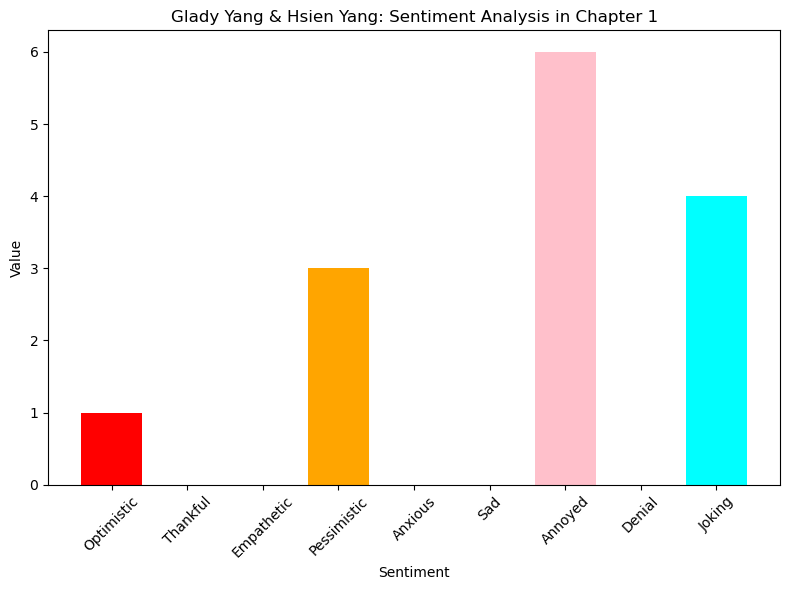

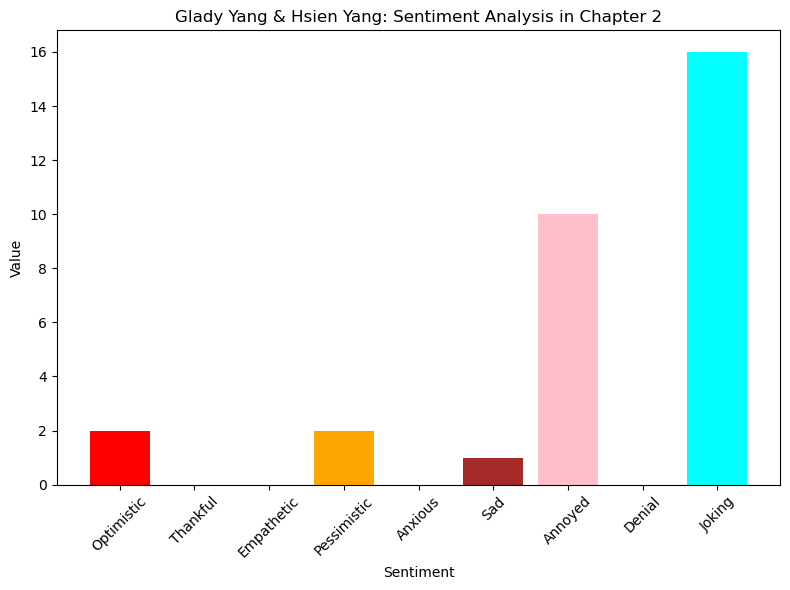

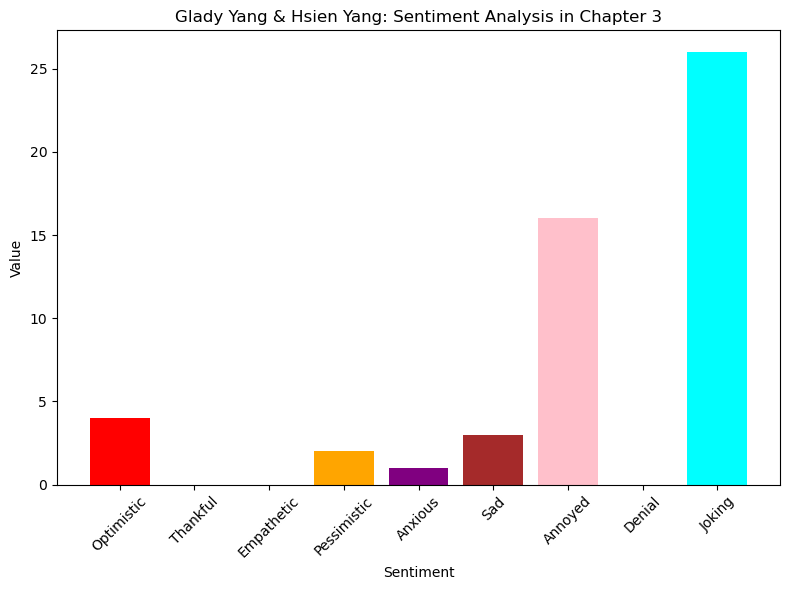

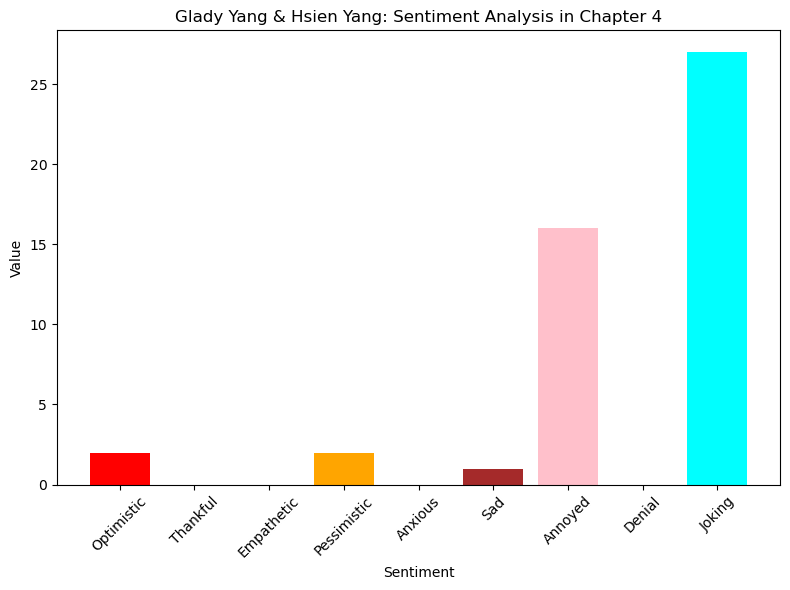

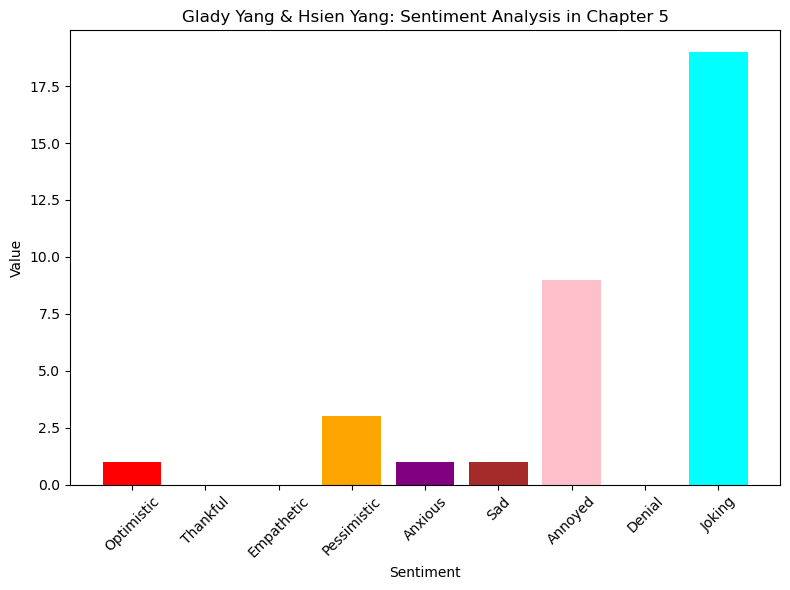

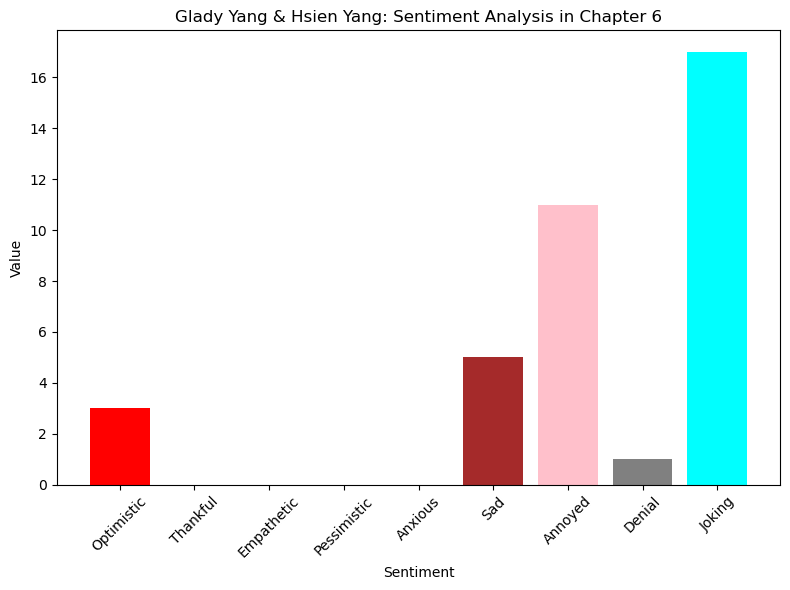

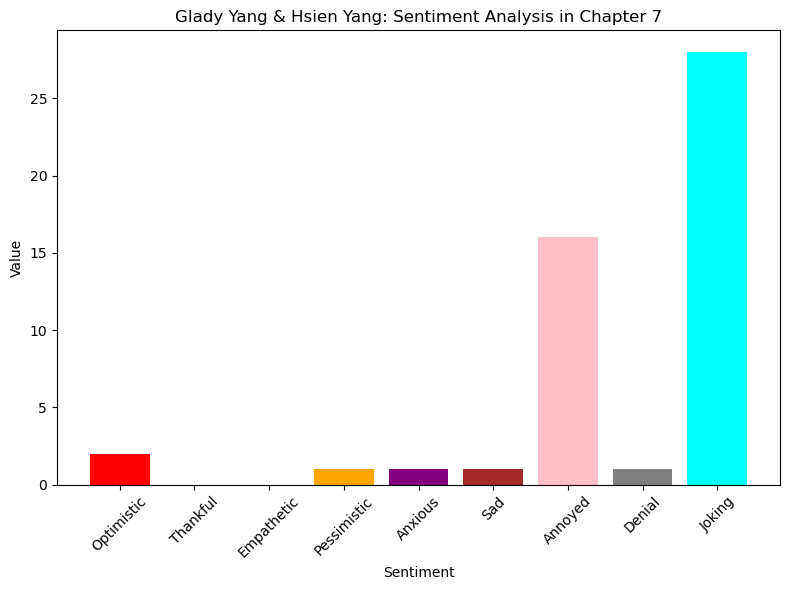

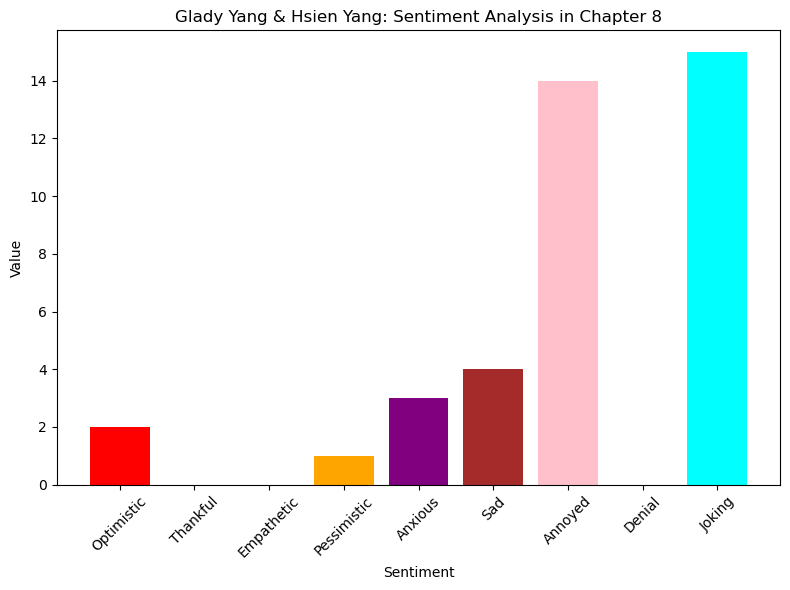

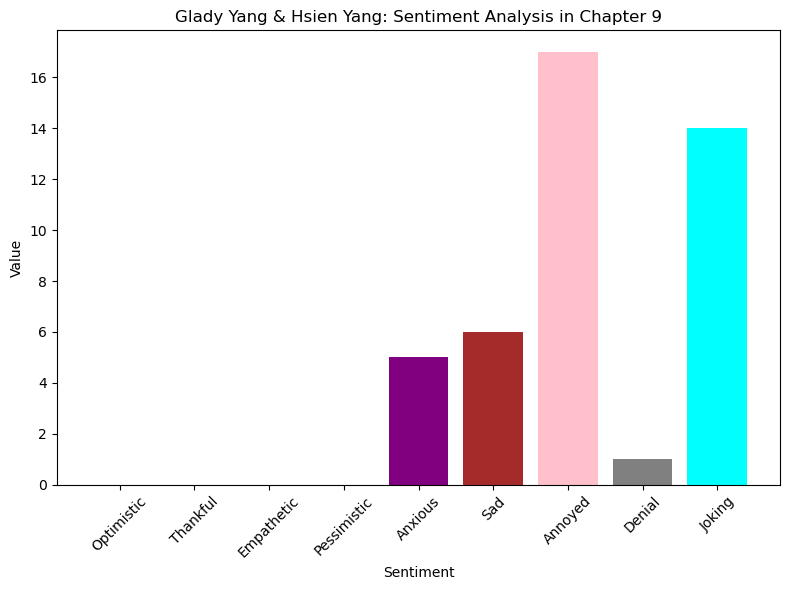

In [13]:
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan']
for chapter in chapter_sentiment_counts_hsien_df.index:
    plt.figure(figsize=(8, 6))  
    plt.bar(chapter_sentiment_counts_hsien_df.columns, chapter_sentiment_counts_hsien_df.loc[chapter], color=colors)
    plt.title(f'Glady Yang & Hsien Yang: Sentiment Analysis in {chapter}')
    plt.xlabel('Sentiment')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

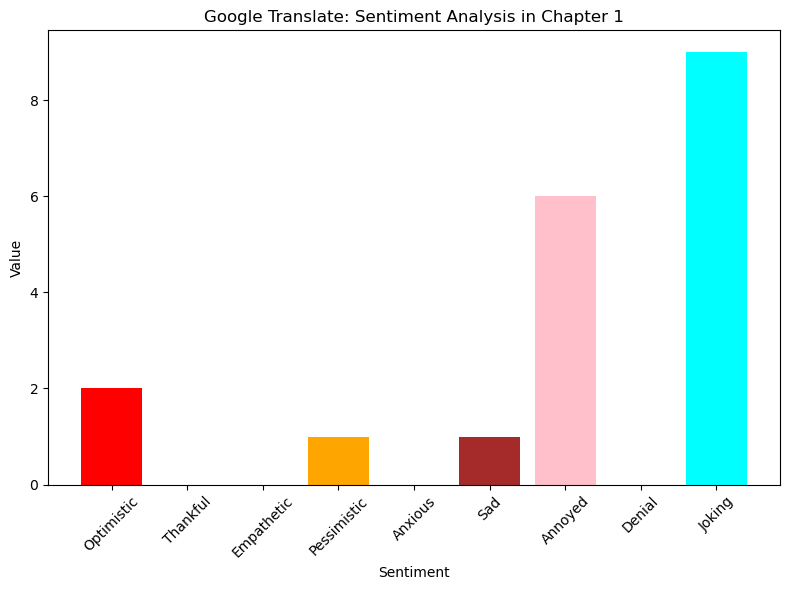

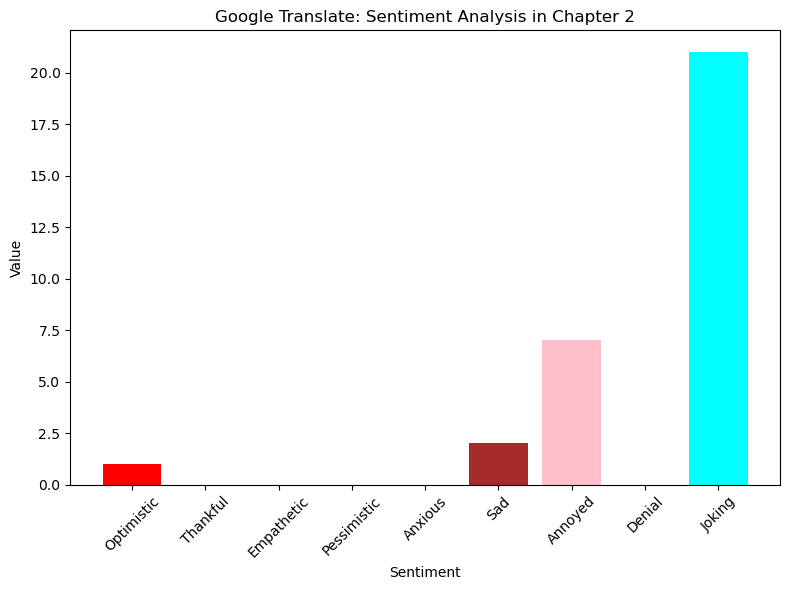

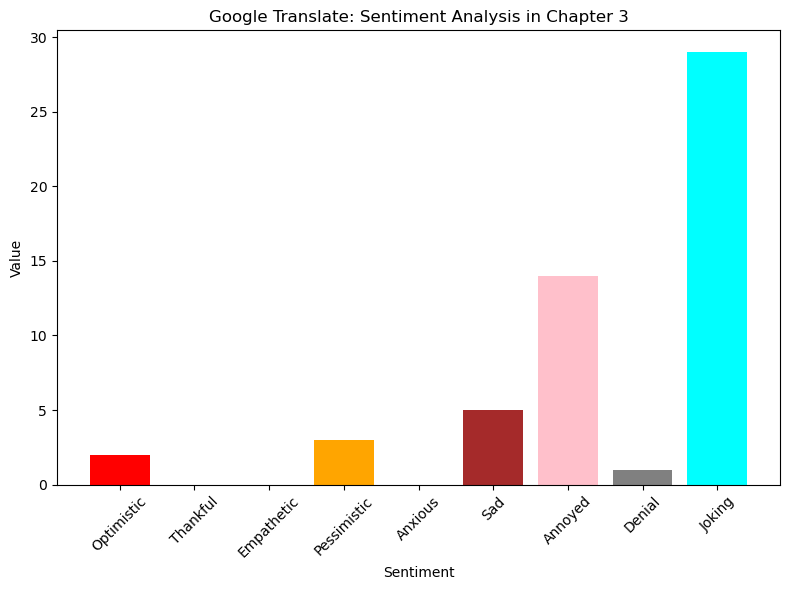

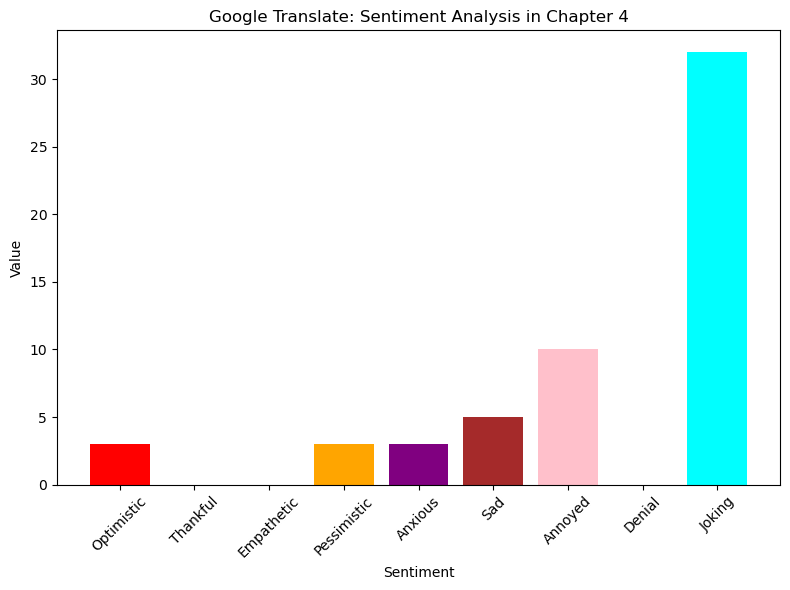

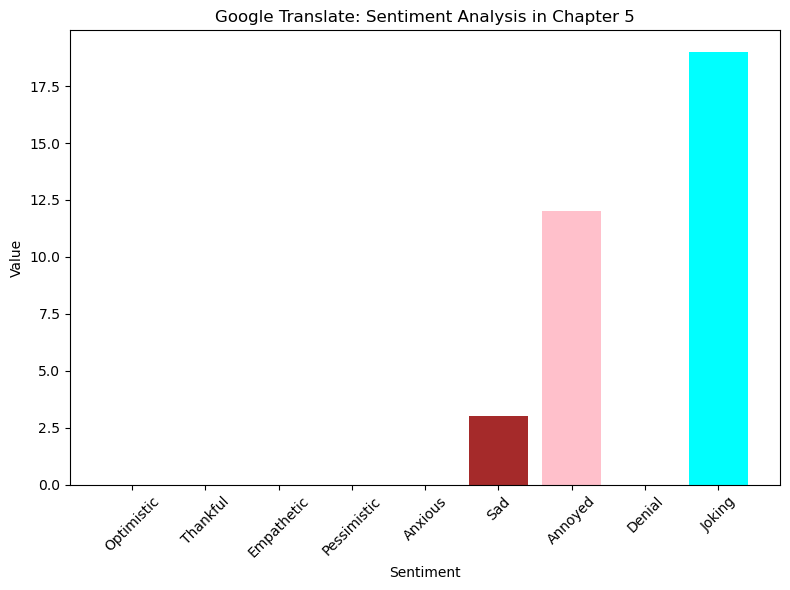

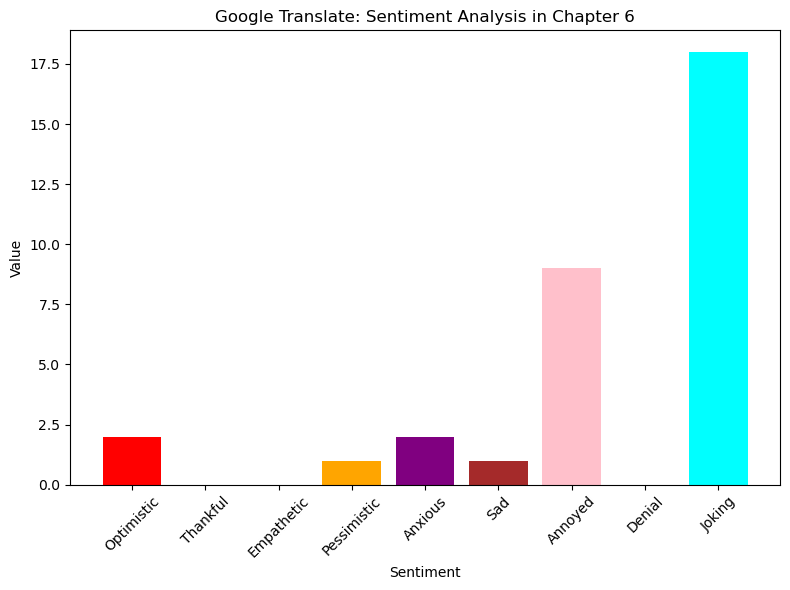

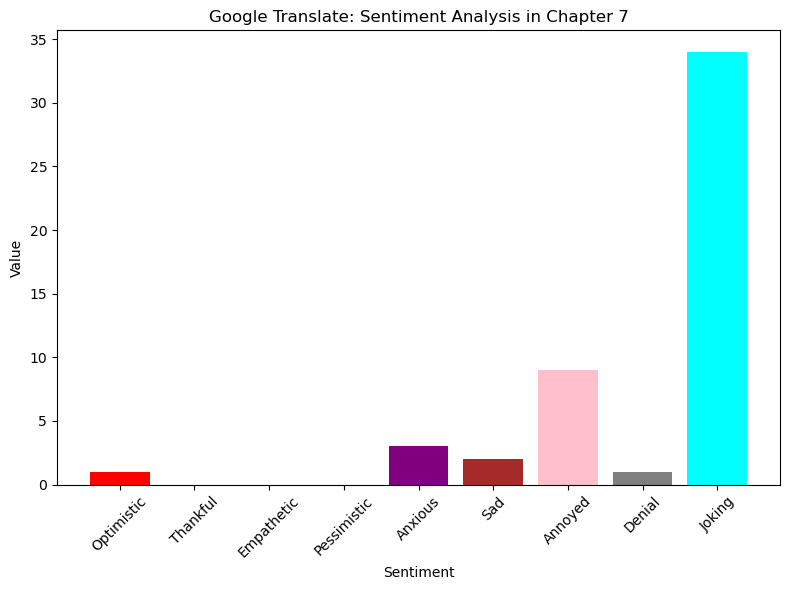

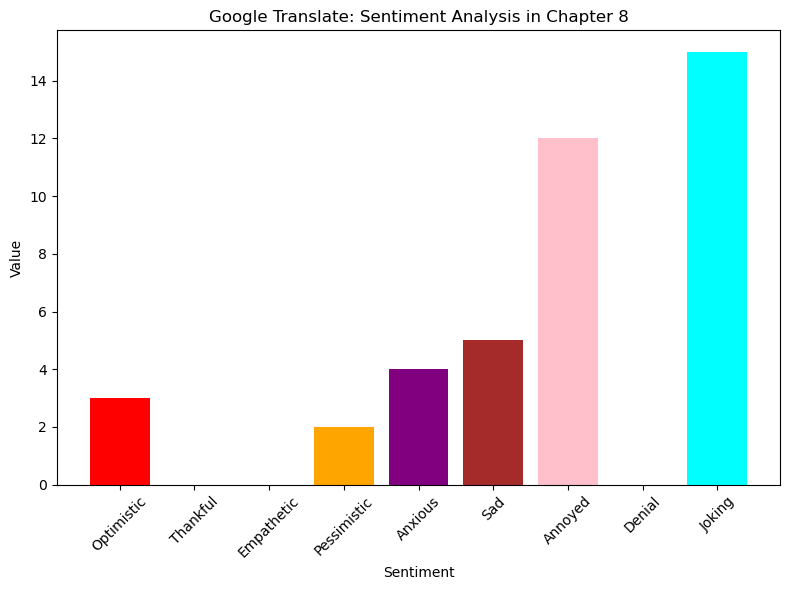

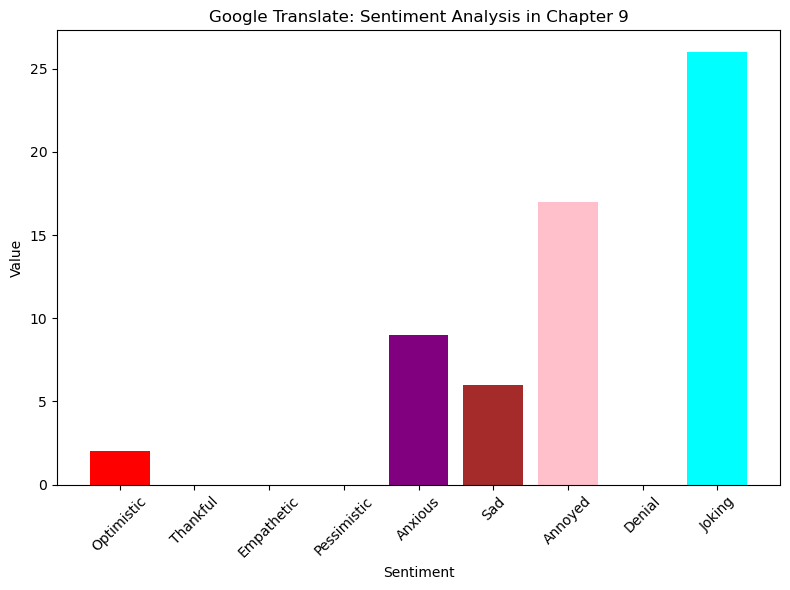

In [14]:
for chapter in chapter_sentiment_counts_google_df.index:
    plt.figure(figsize=(8, 6))  # Adjust figsize as needed
    plt.bar(chapter_sentiment_counts_google_df.columns, chapter_sentiment_counts_google_df.loc[chapter], color=colors)
    plt.title(f'Google Translate: Sentiment Analysis in {chapter}')
    plt.xlabel('Sentiment')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

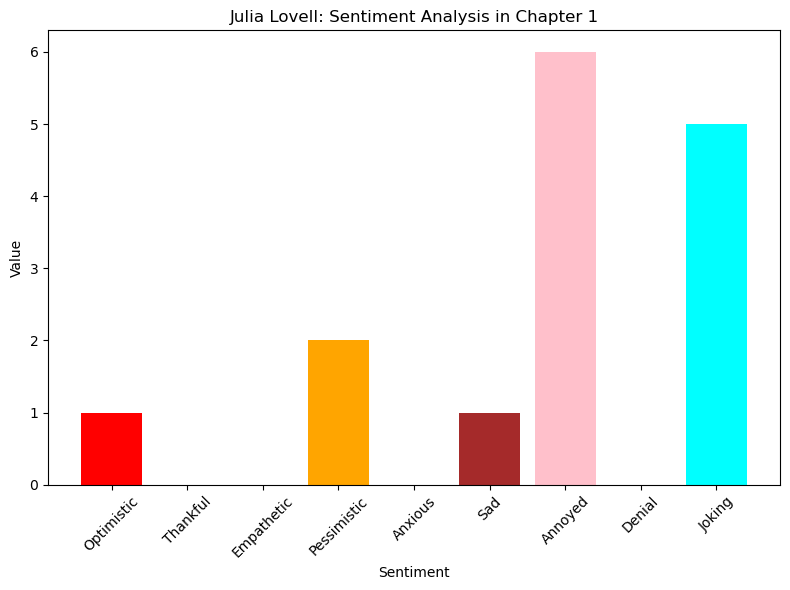

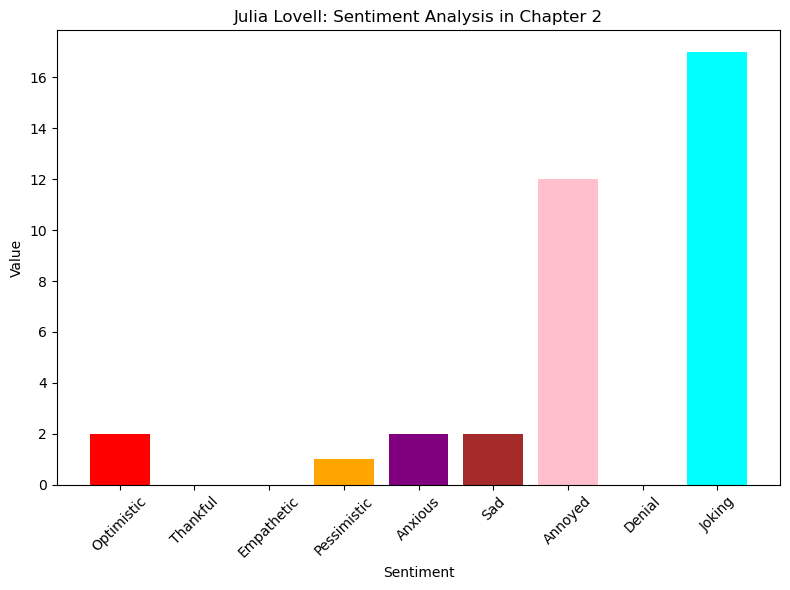

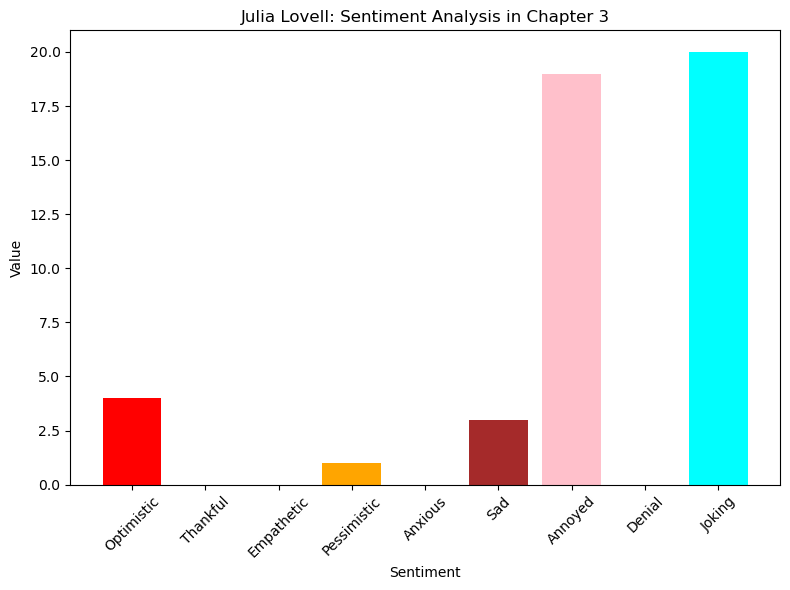

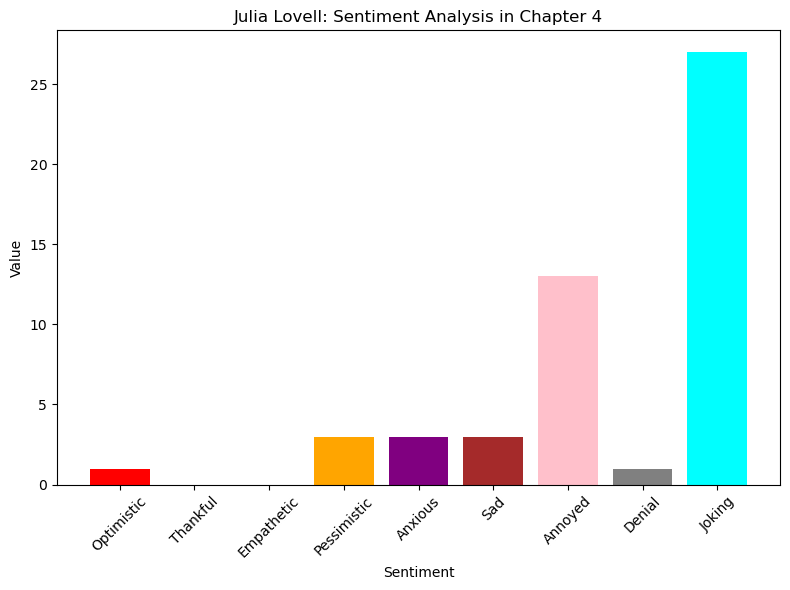

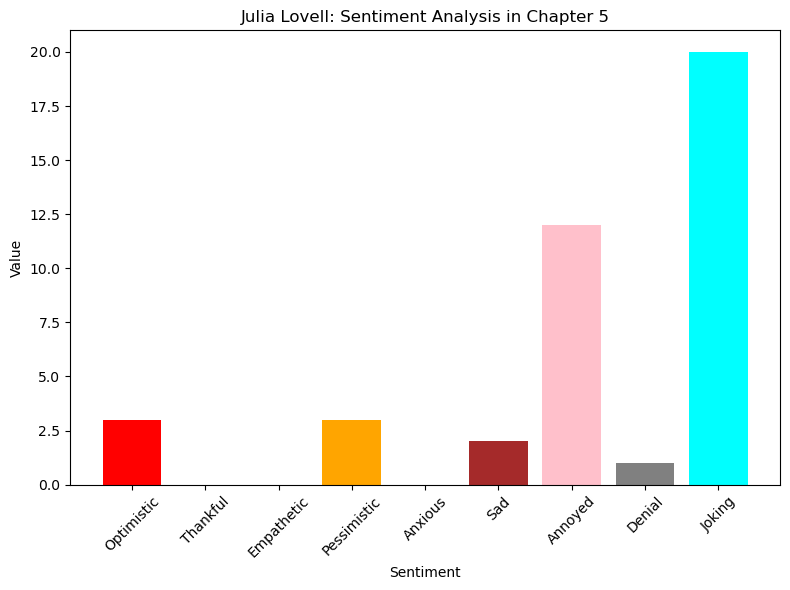

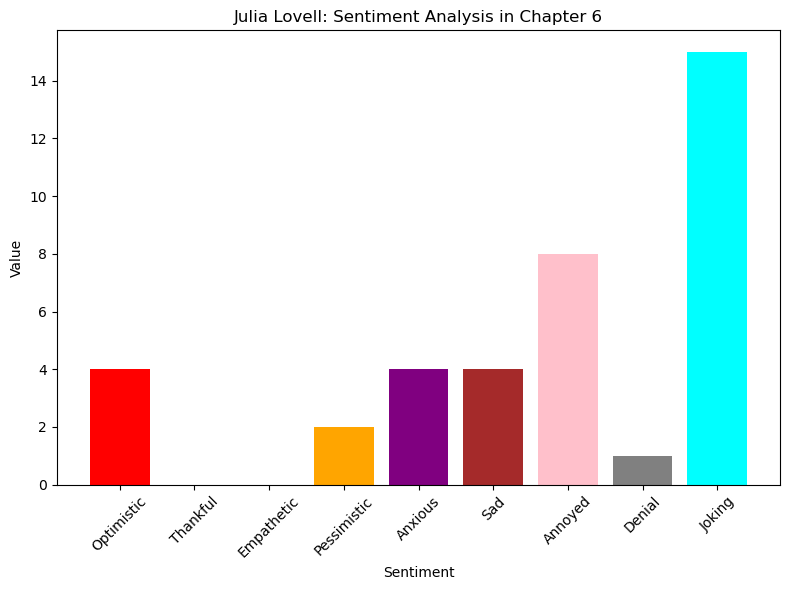

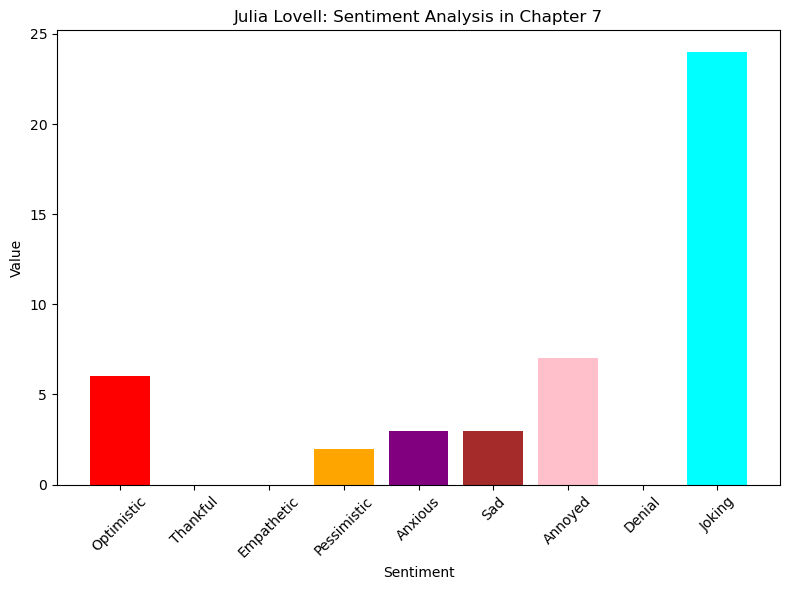

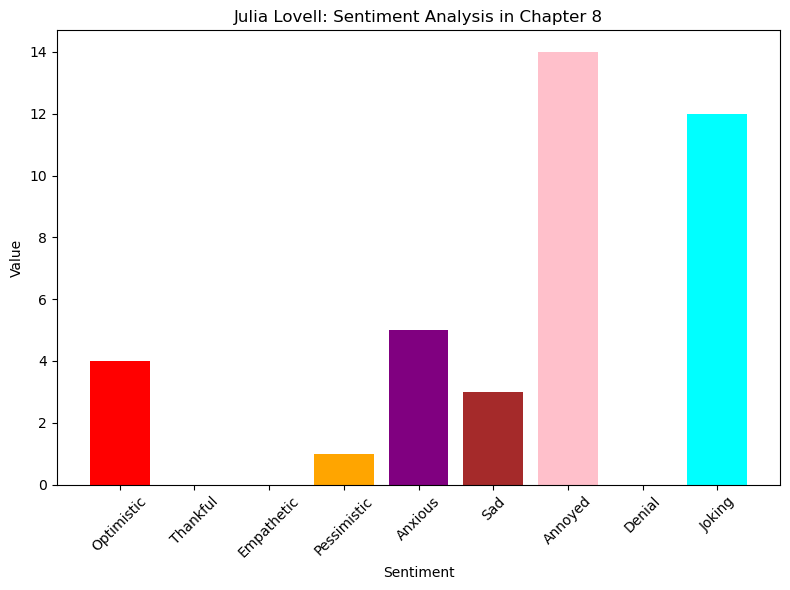

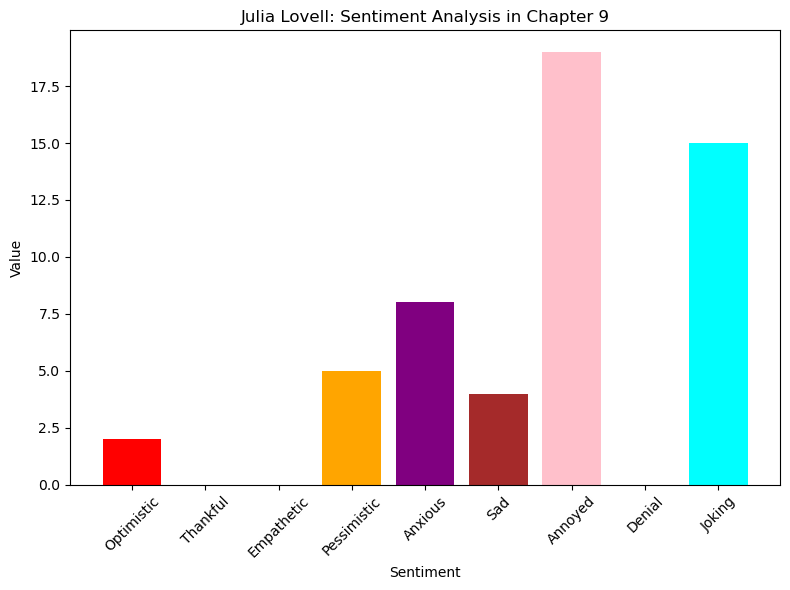

In [15]:
for chapter in chapter_sentiment_counts_julia_df.index:
    plt.figure(figsize=(8, 6))  # Adjust figsize as needed
    plt.bar(chapter_sentiment_counts_julia_df.columns, chapter_sentiment_counts_julia_df.loc[chapter], color=colors)
    plt.title(f'Julia Lovell: Sentiment Analysis in {chapter}')
    plt.xlabel('Sentiment')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [5]:
def chapter_wise_dataframe(path):
  
    df = pd.read_csv(path)

    df = df.drop(['Tweet'], axis=1)
    df = df.apply(pd.Series.value_counts)

    df['Optimistic'] = df['Optimistic'].fillna(0)
    df['Thankful'] = df['Thankful'].fillna(0)
    df['Empathetic'] = df['Empathetic'].fillna(0)
    df['Pessimistic'] = df['Pessimistic'].fillna(0)
    df['Anxious'] = df['Anxious'].fillna(0)
    df['Sad'] = df['Sad'].fillna(0)
    df['Annoyed'] = df['Annoyed'].fillna(0)
    df['Denial'] = df['Denial'].fillna(0)
    df['Joking'] = df['Joking'].fillna(0)

    df = df.iloc[1]

    df = pd.DataFrame(df)

    df.columns = [ 'Count']

    return df

In [7]:
from matplotlib.lines import Line2D
from matplotlib.ticker import StrMethodFormatter

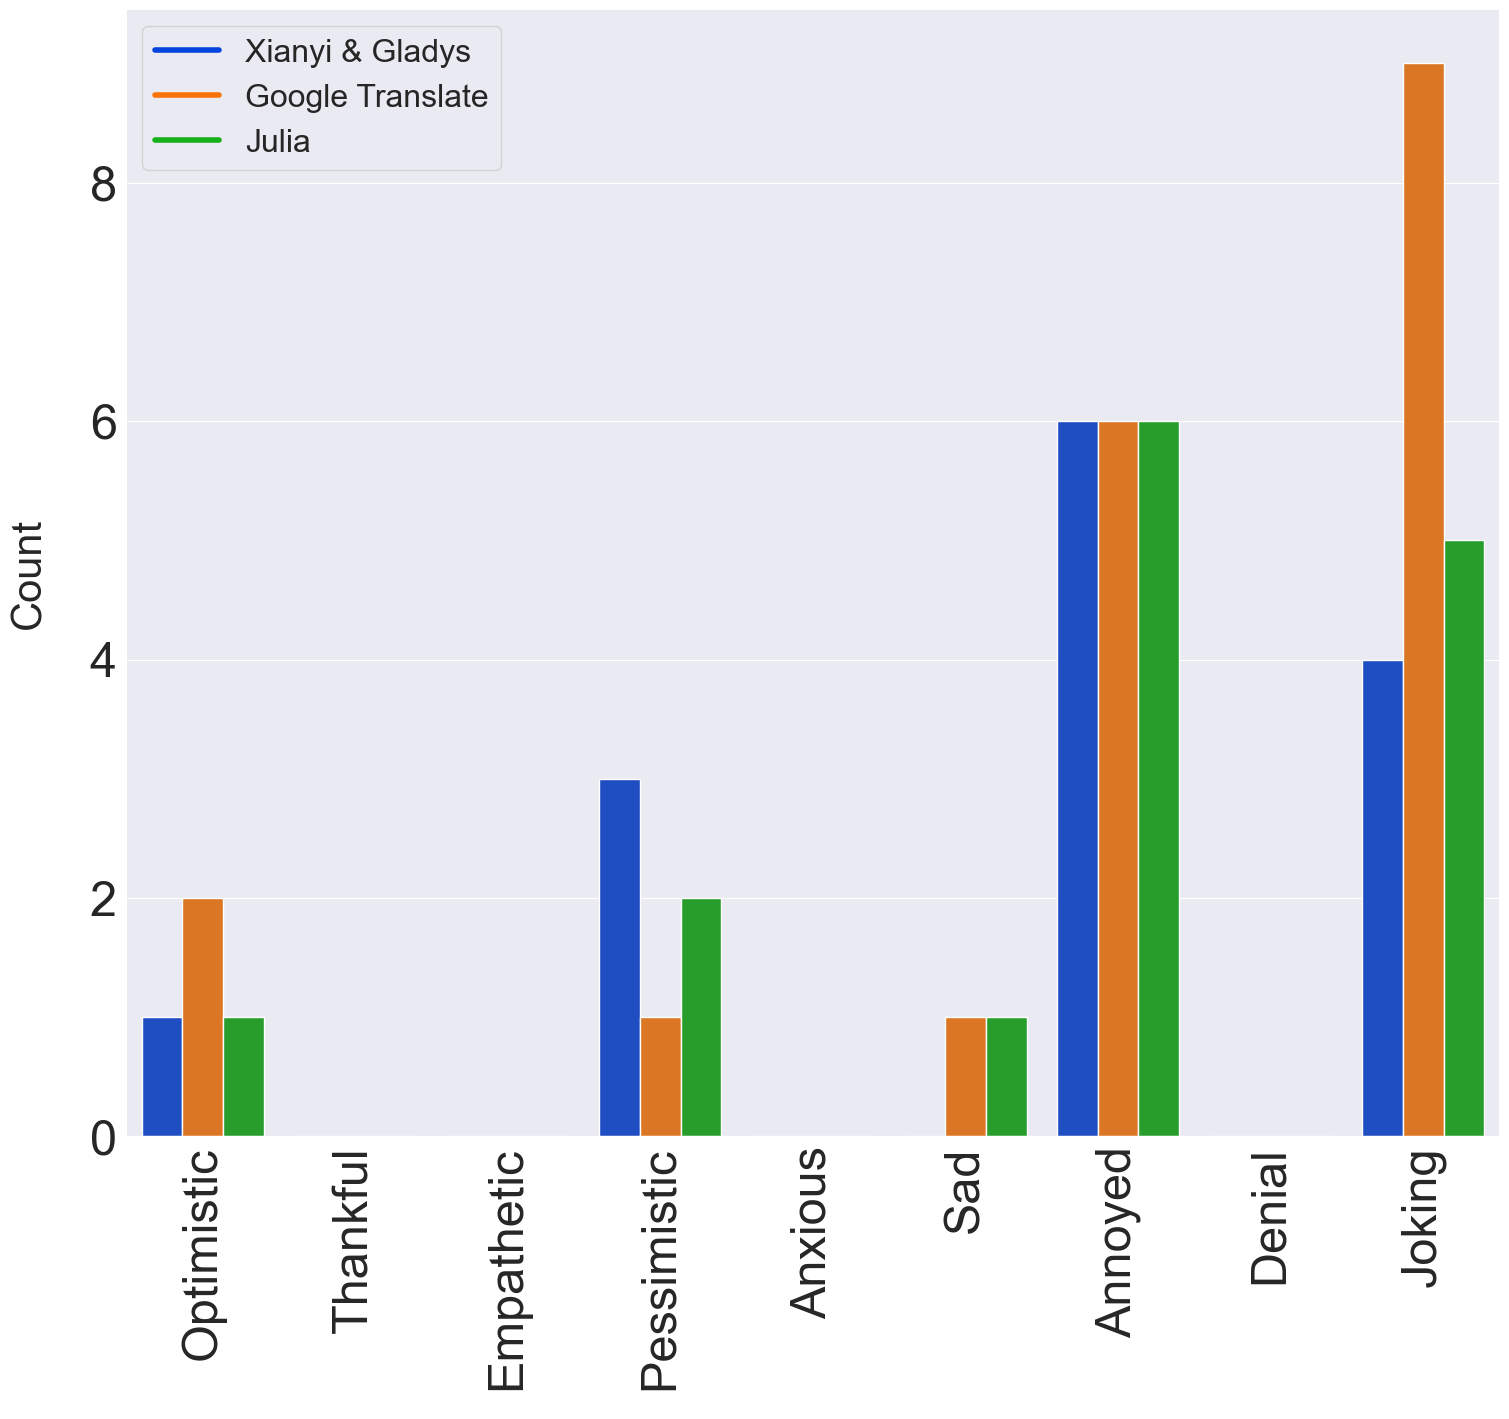

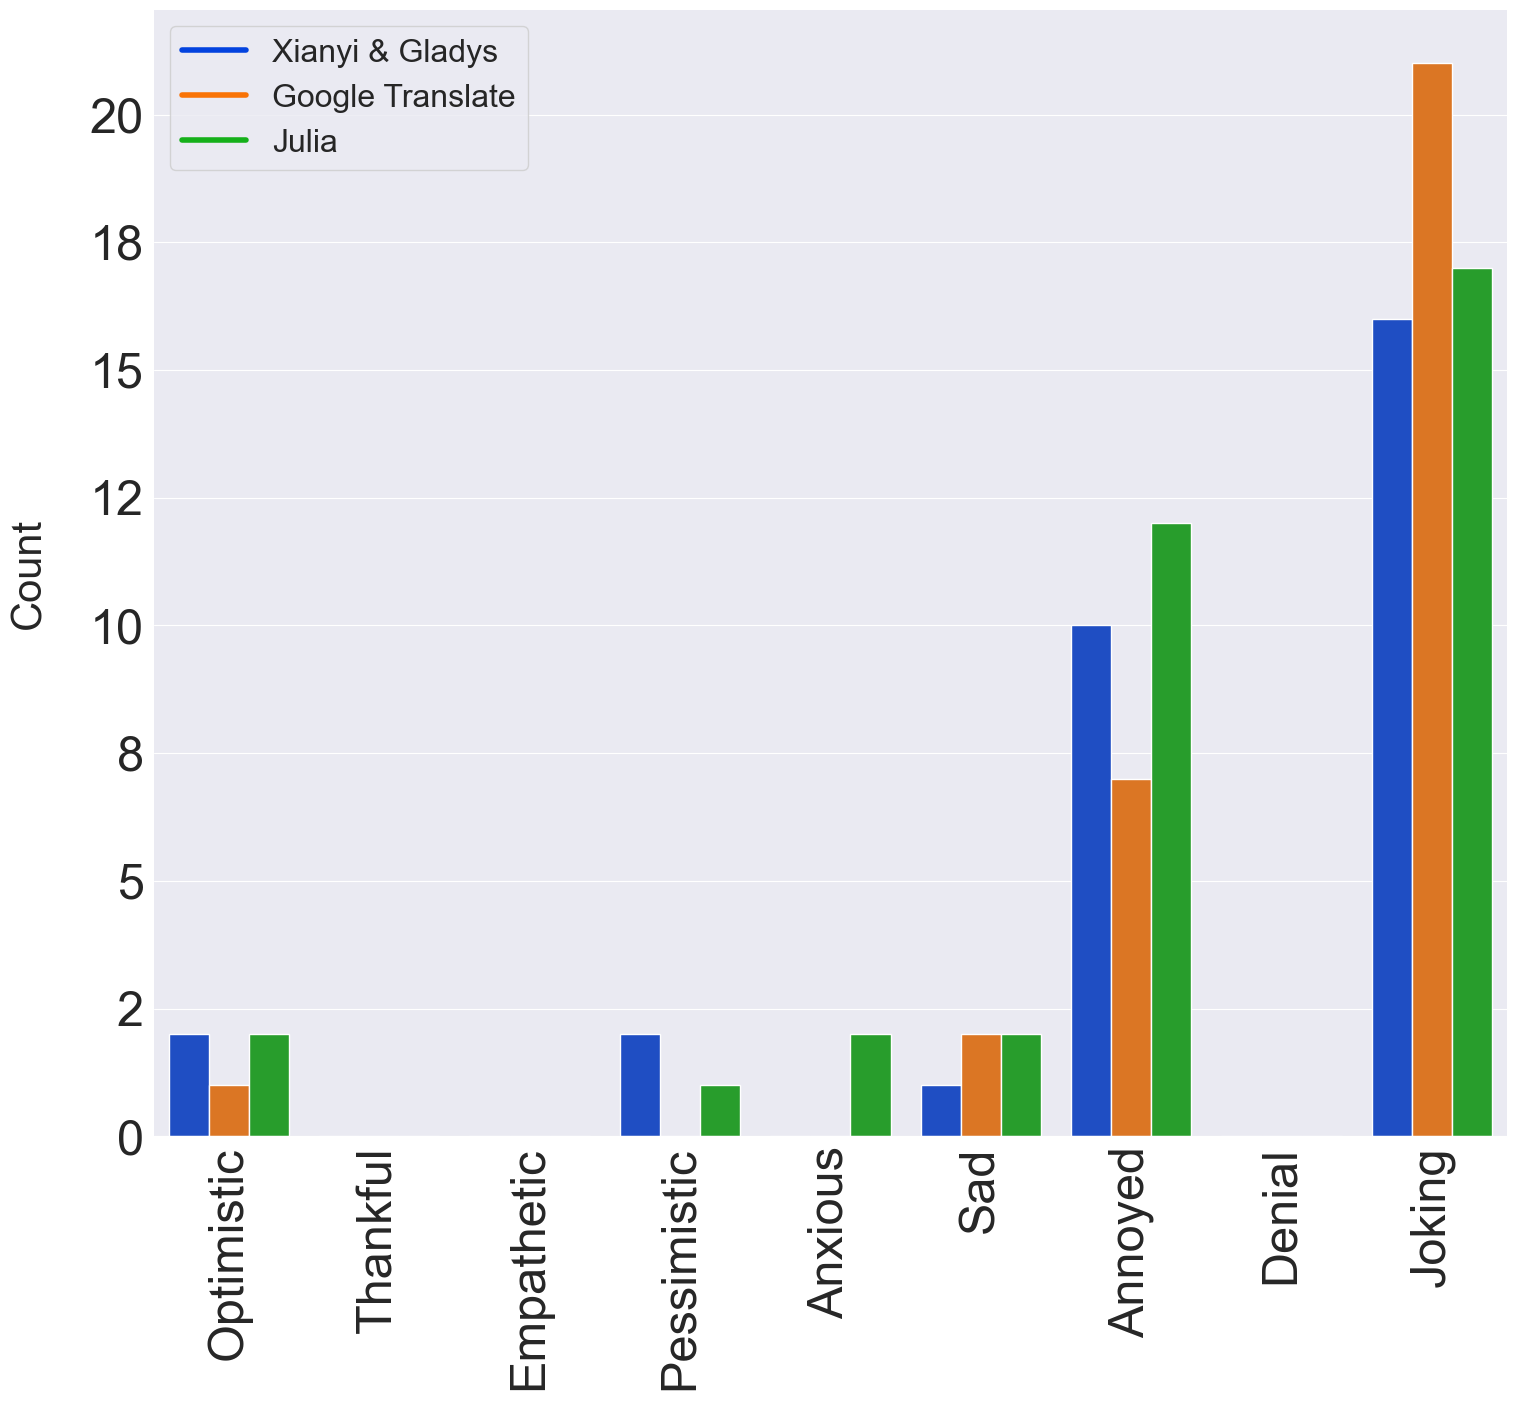

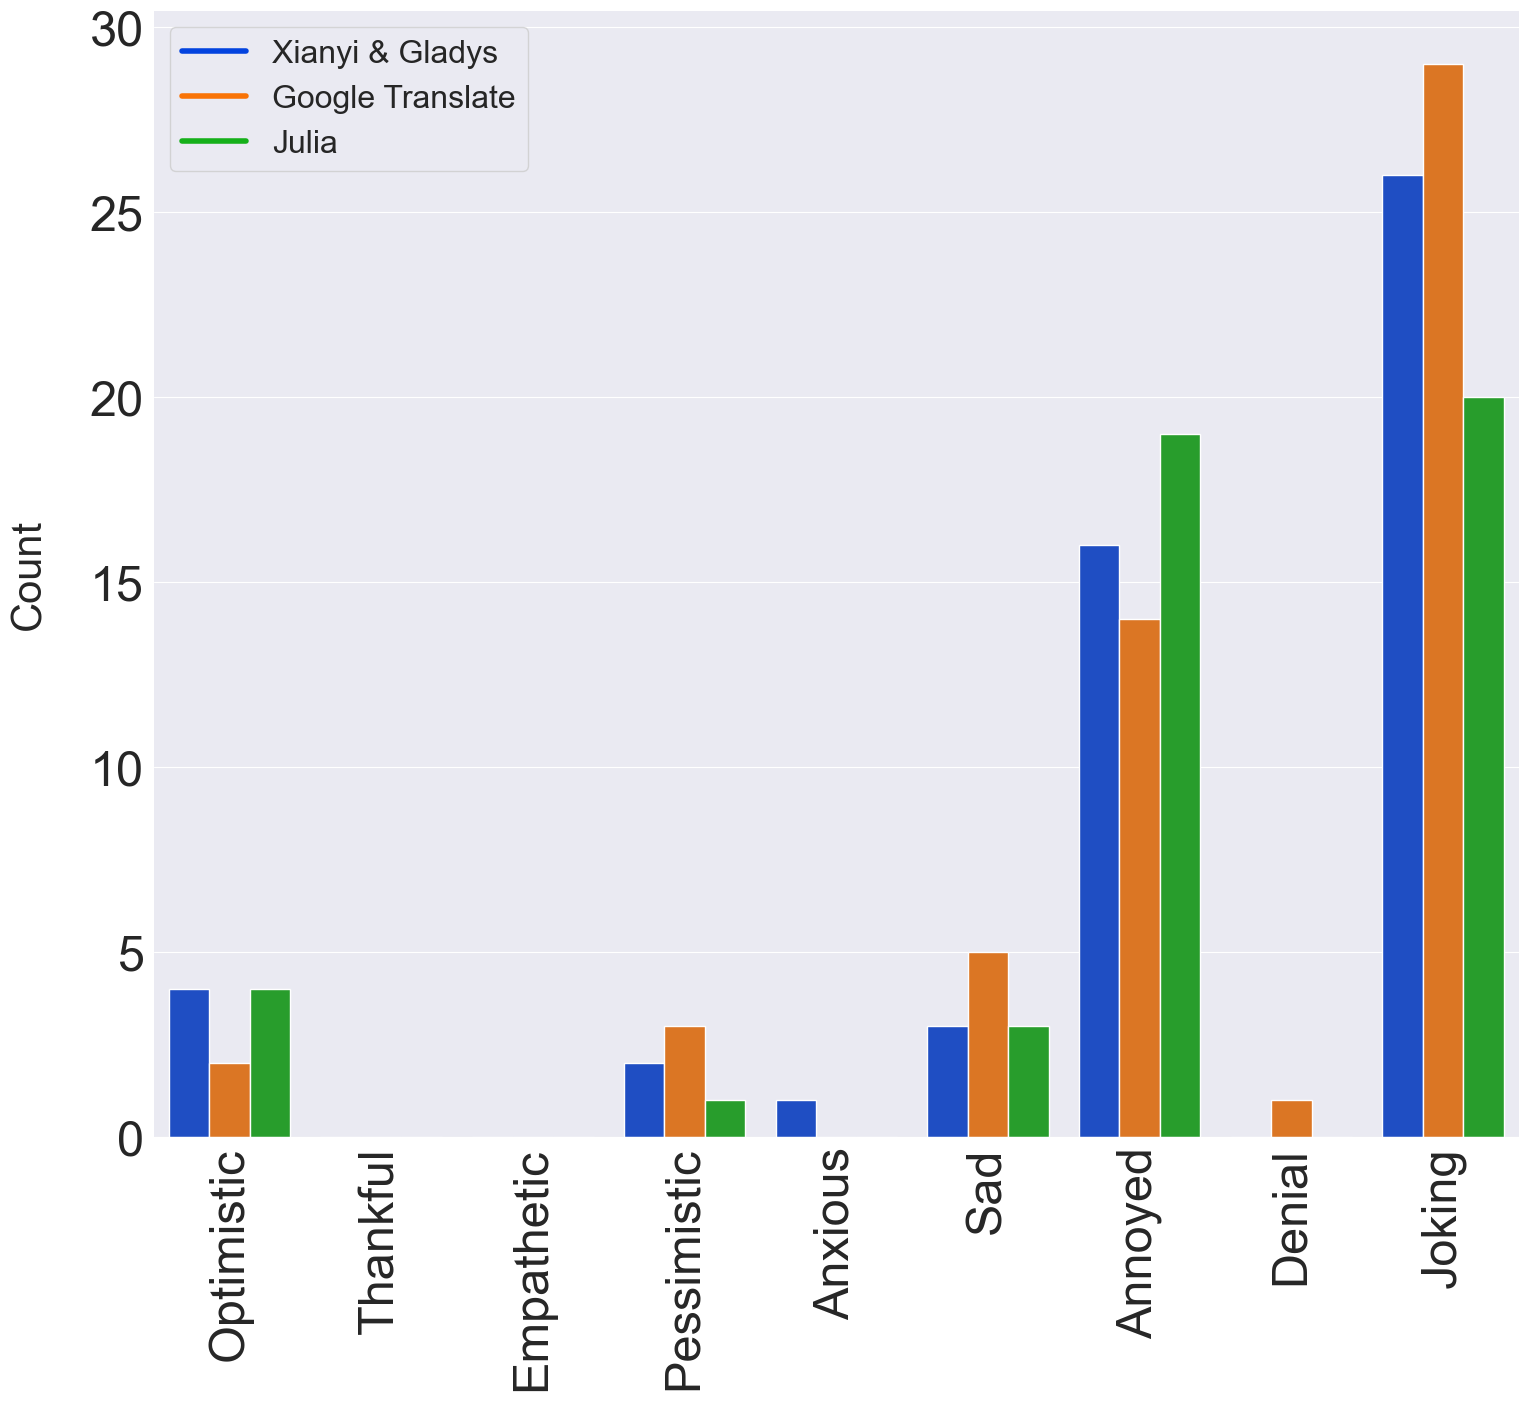

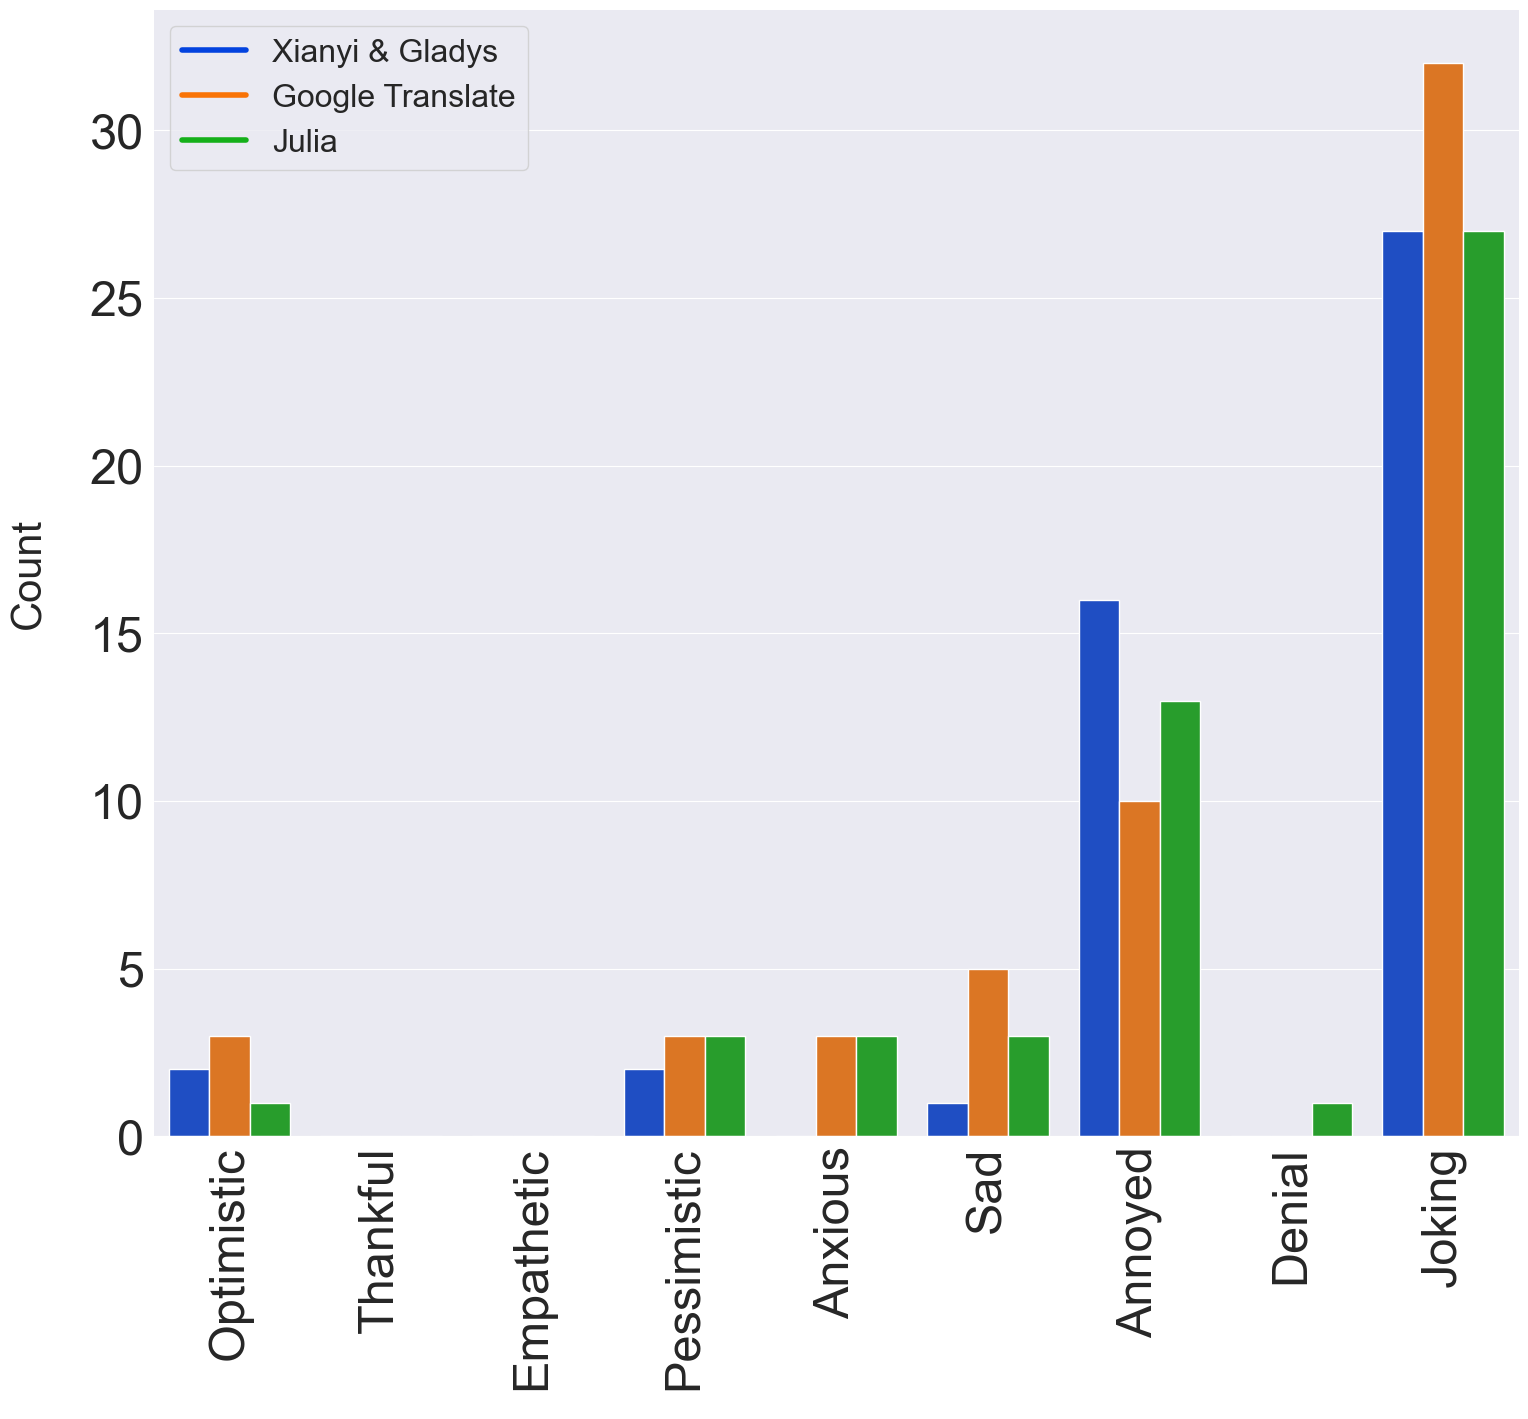

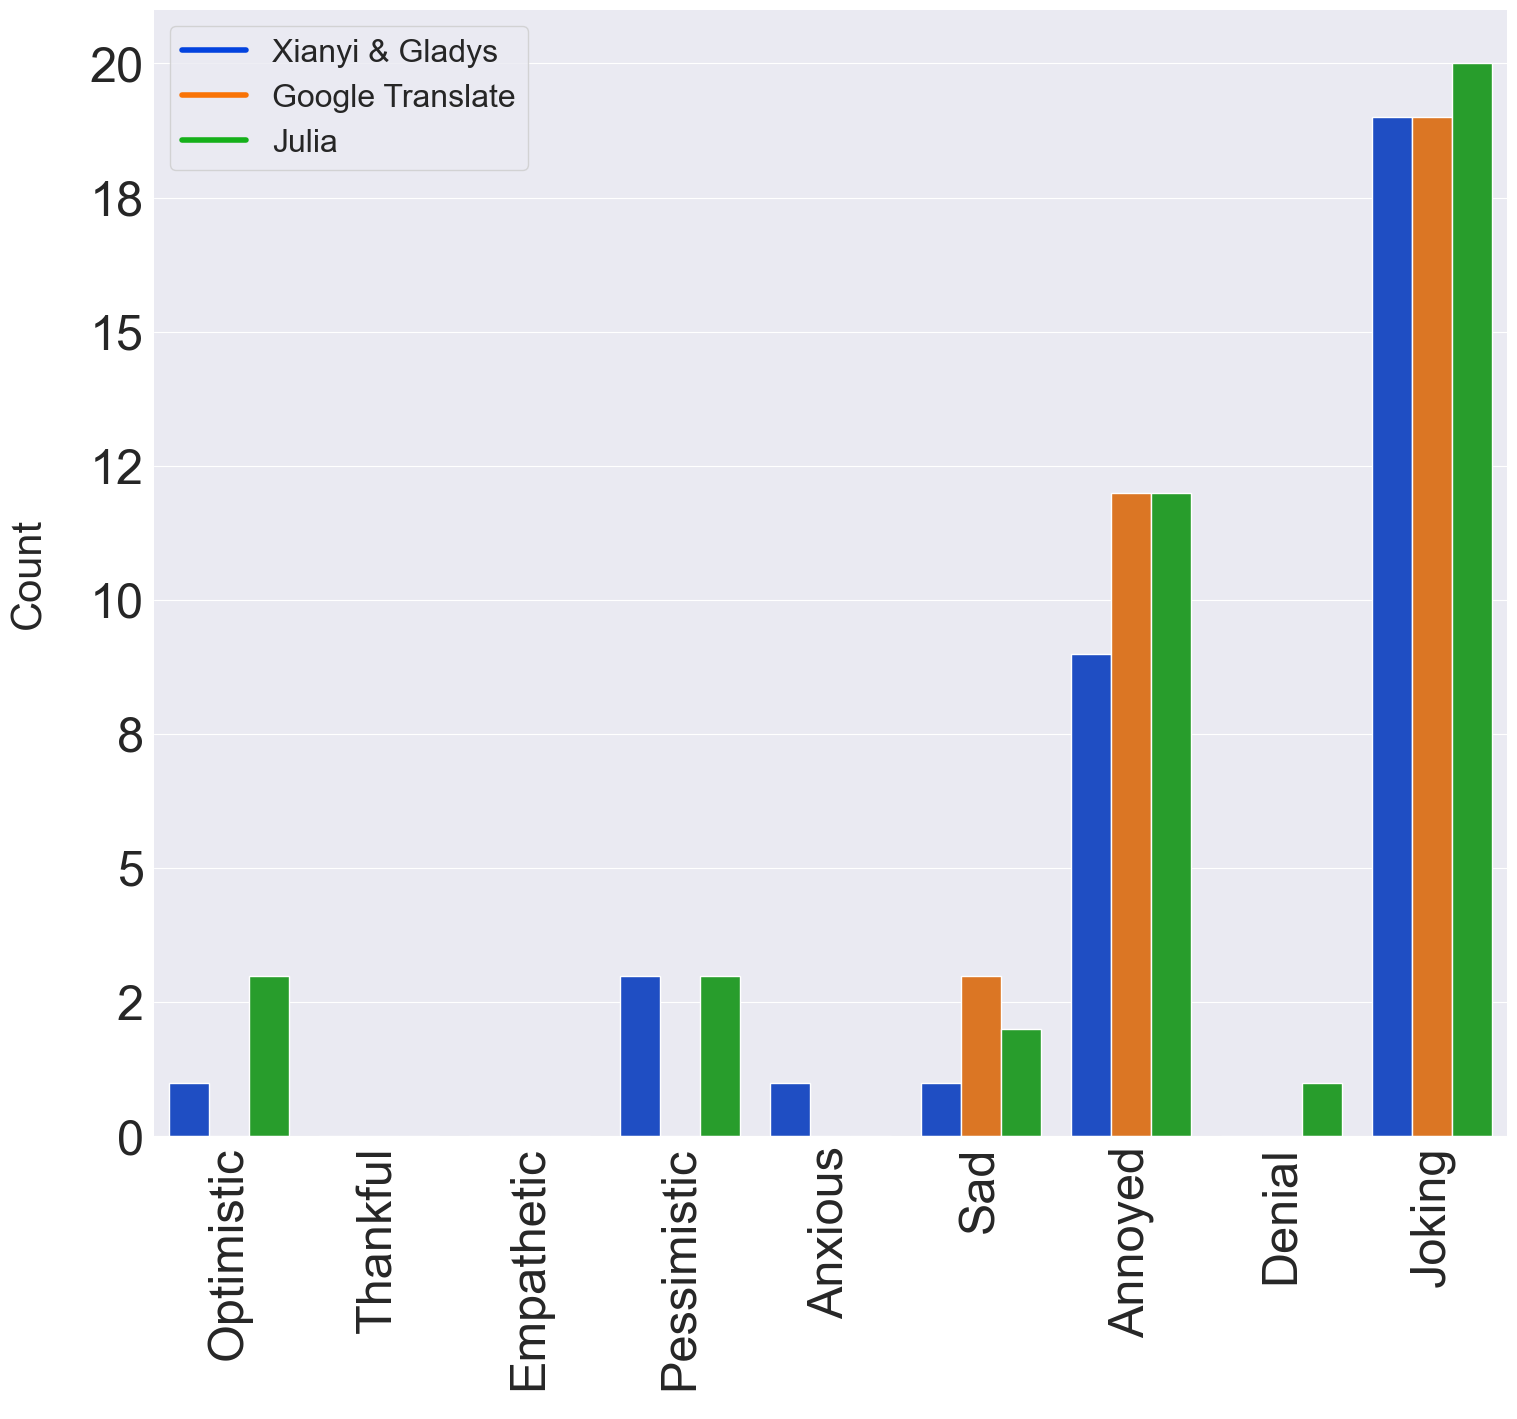

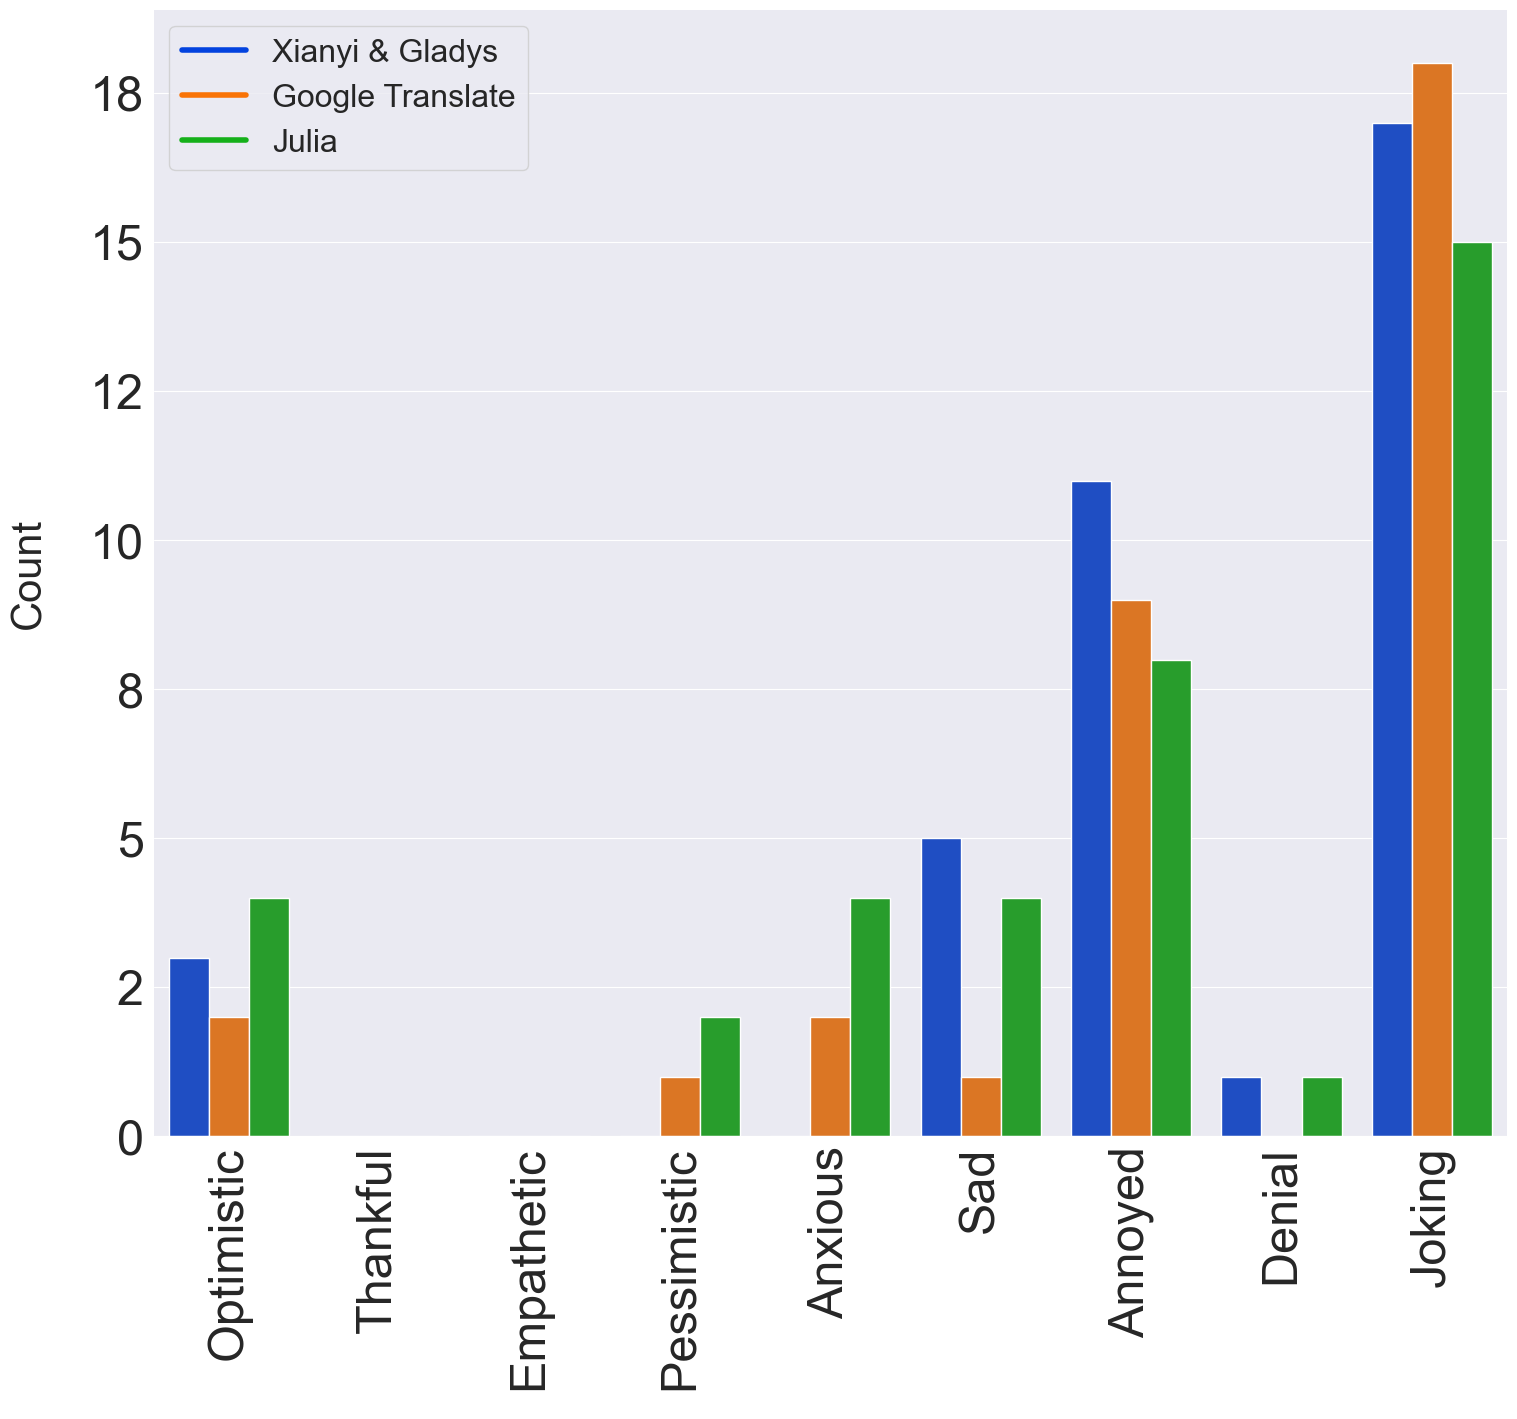

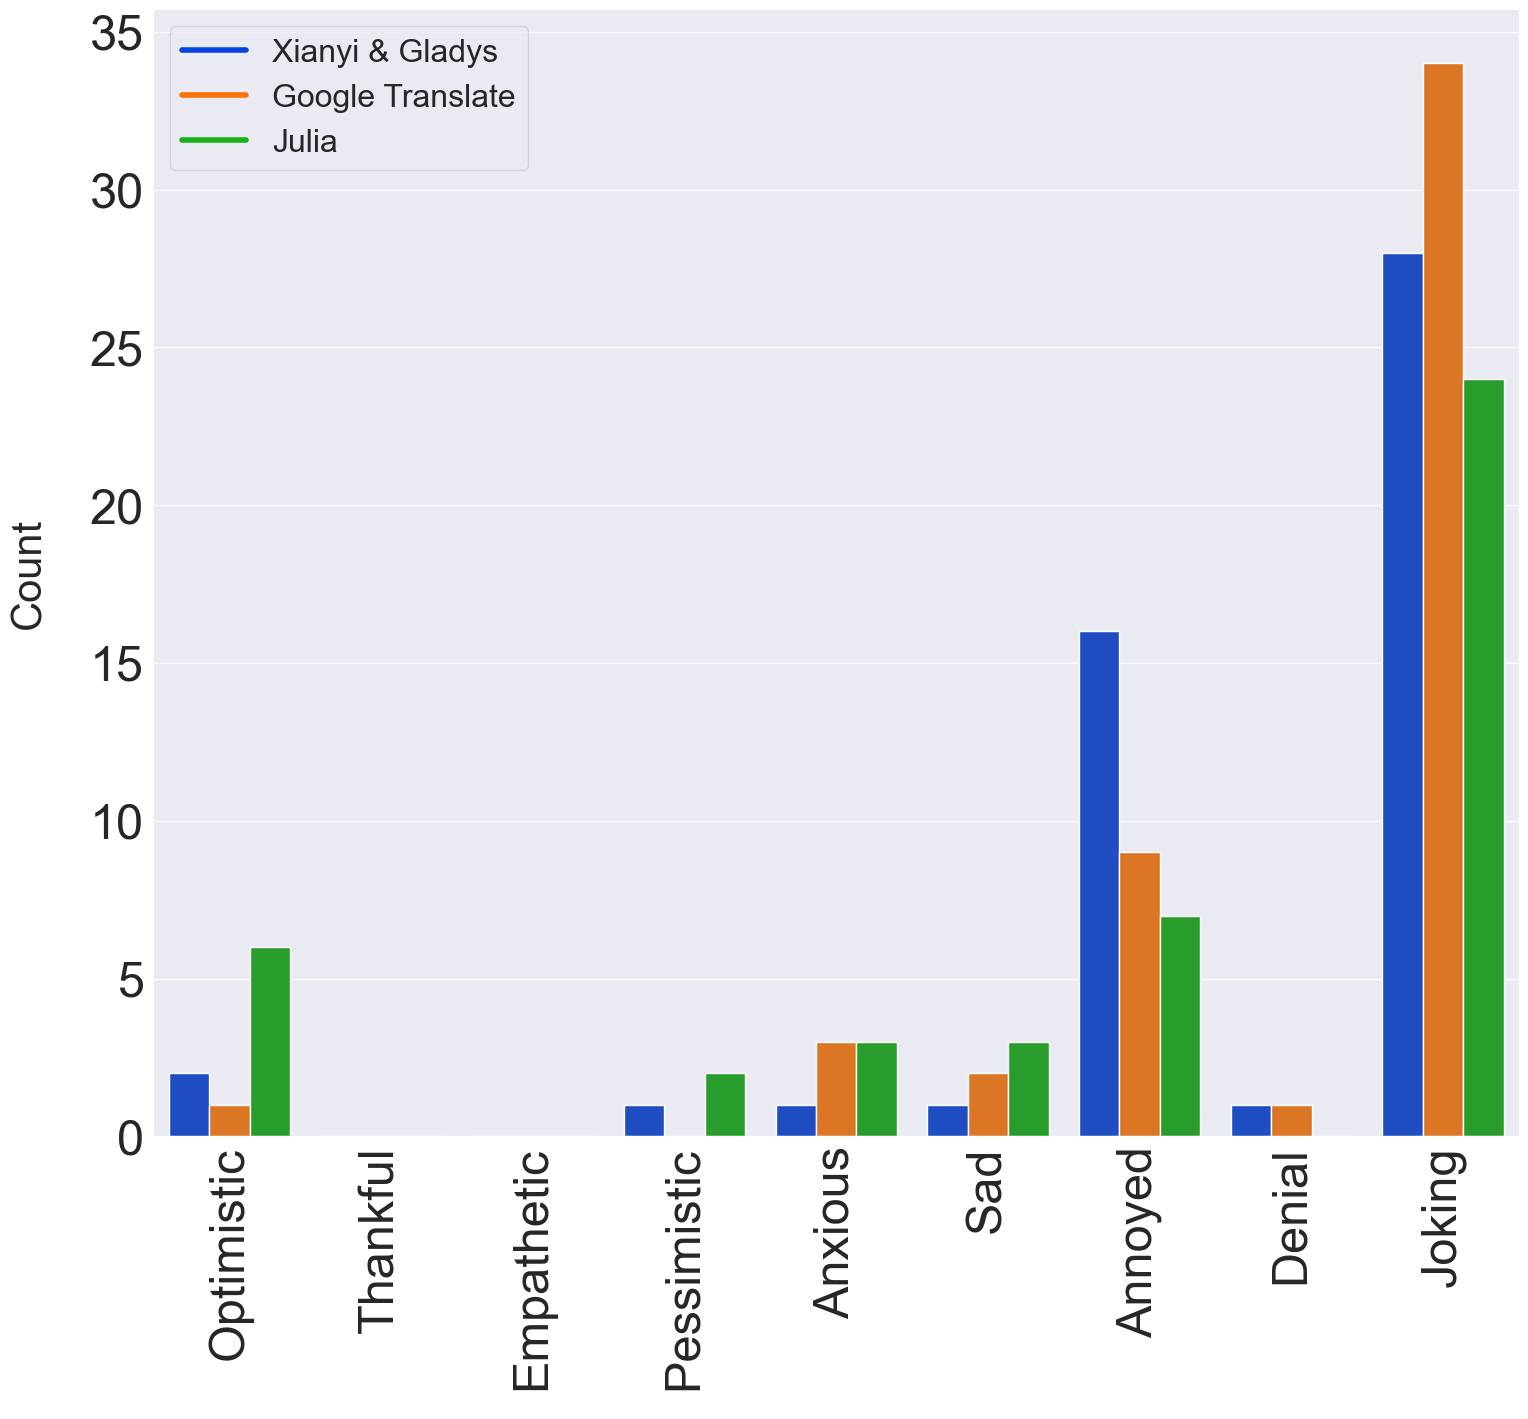

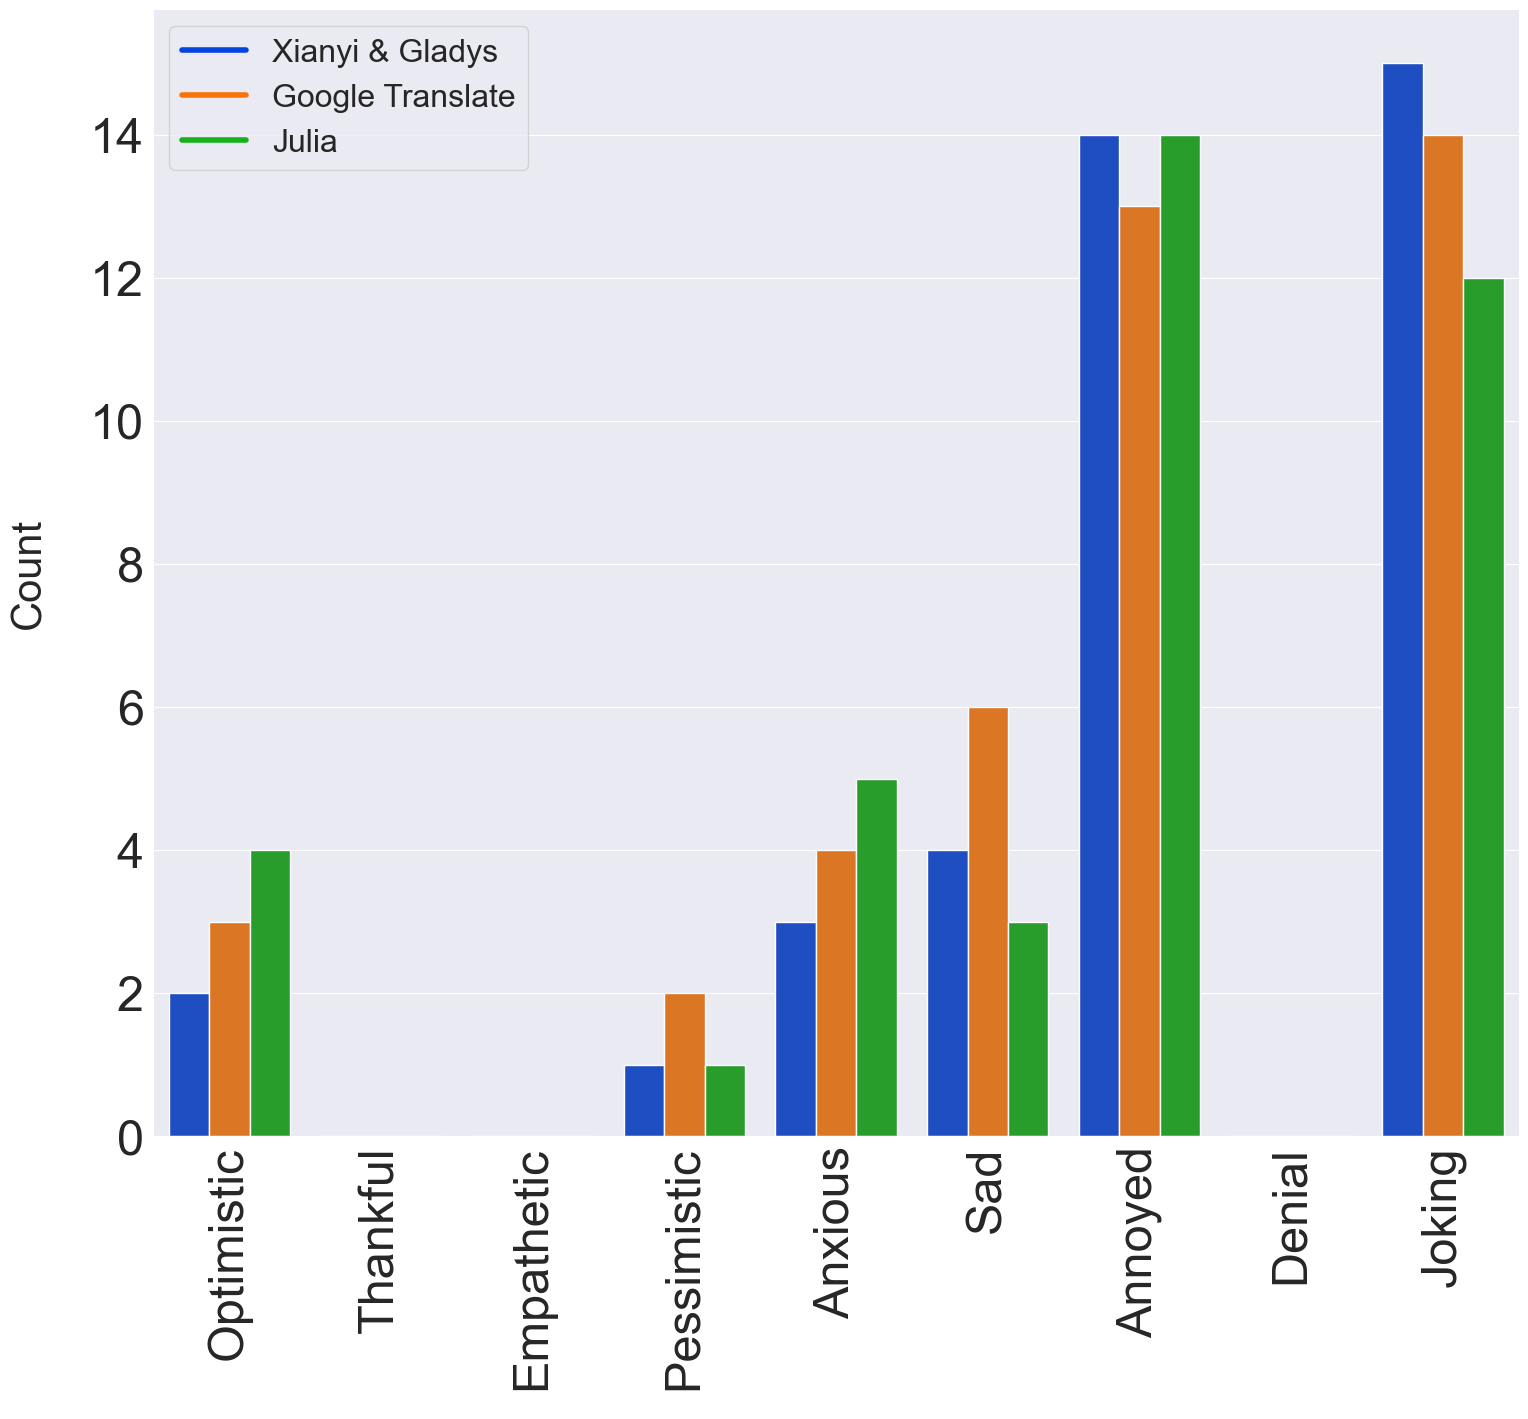

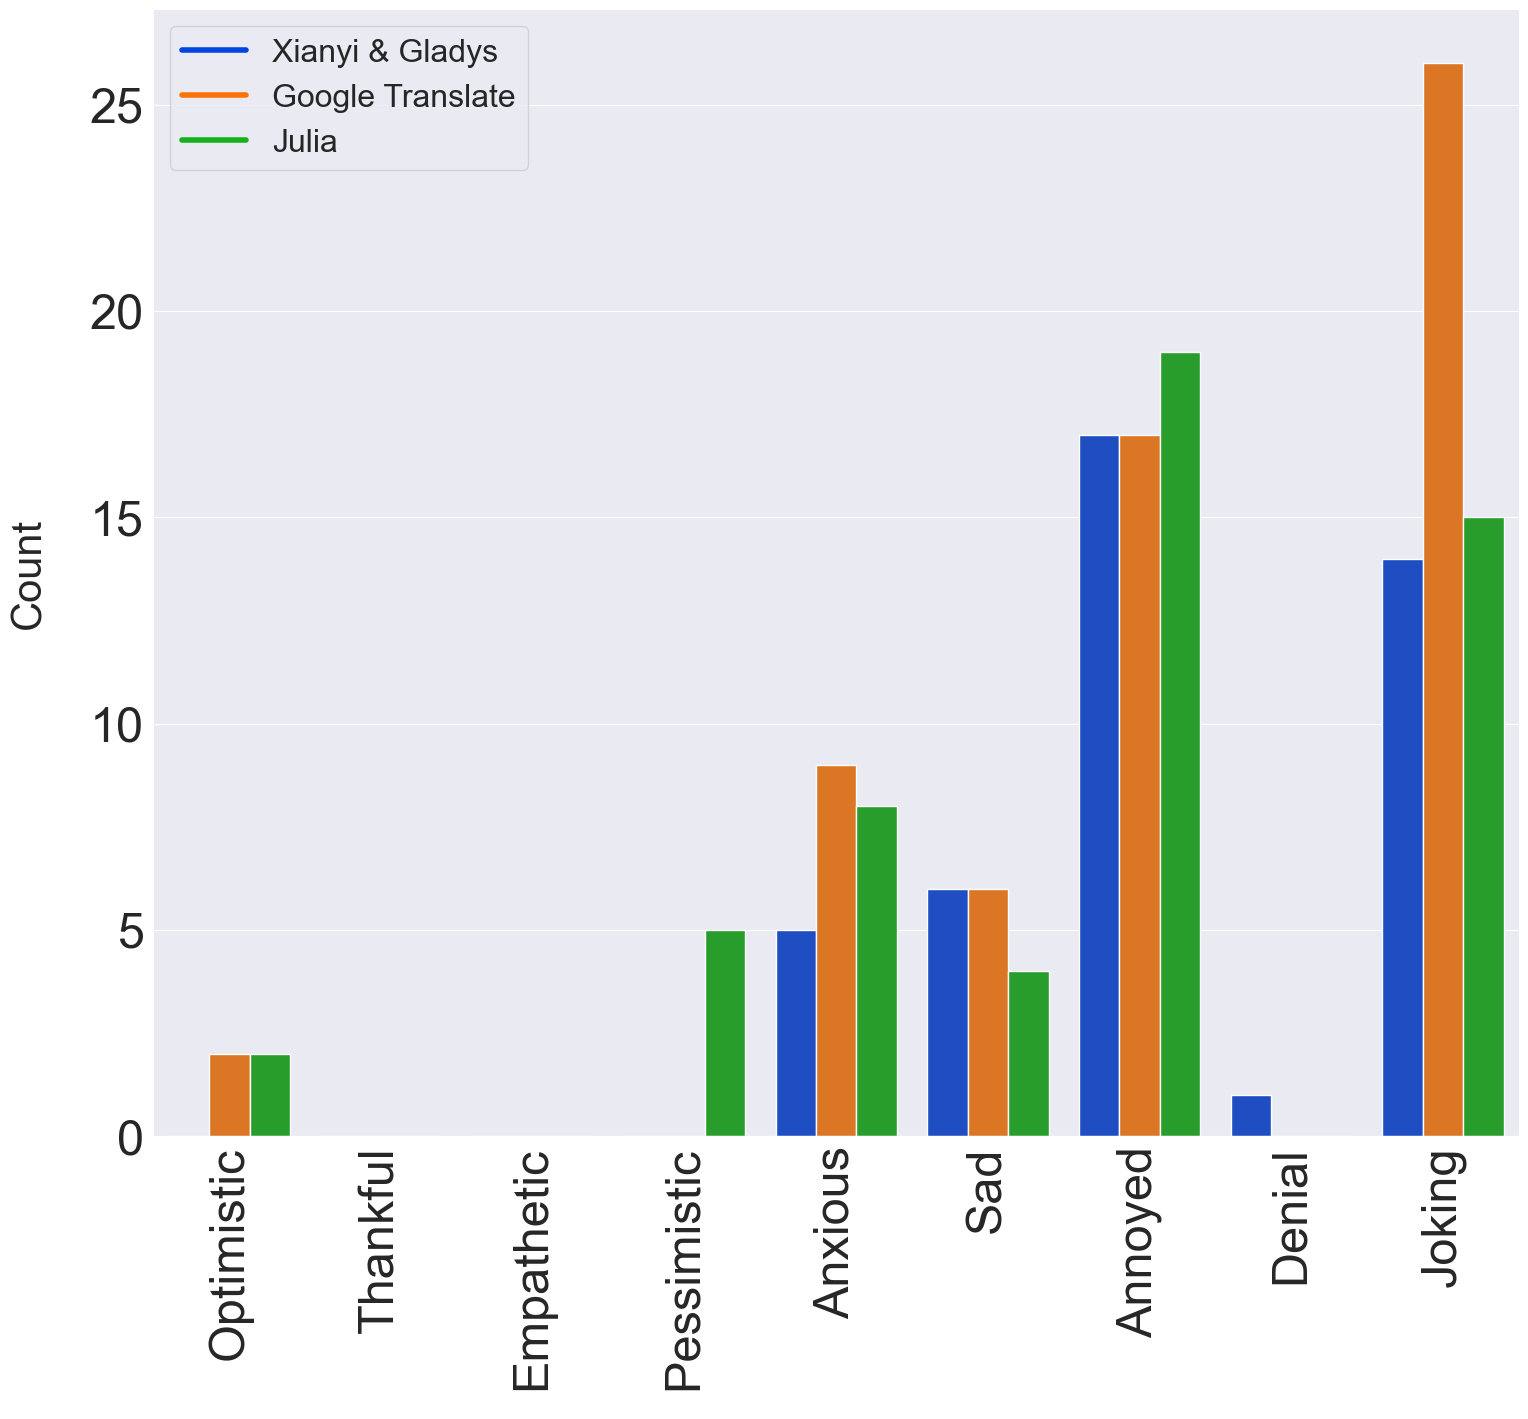

In [10]:
for i in range(1, 10):
    hsien_yang = chapter_wise_dataframe(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_hsien_chapter{i}.csv')
    google_translate = chapter_wise_dataframe(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_google_chapter{i}.csv')
    julia_Lovell = chapter_wise_dataframe(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_julia_chapter{i}.csv')

    df_new = pd.concat([hsien_yang, google_translate['Count'], julia_Lovell['Count']], axis=1)
    df_new.columns = ['Xianyi & Gladys', 'Google Translate', 'Julia']
    df_new = df_new.reset_index()
    df_new = df_new.rename(columns={"index": "Sentiment"})
    df_new = pd.melt(df_new, id_vars="Sentiment", var_name="Author", value_name="Count")

    colors = ["blue", "orange", "green"]
    myPalette = sns.xkcd_palette(colors)

    sns.set_style("darkgrid")
    g = sns.catplot(x='Sentiment', y='Count', hue='Author', data=df_new, kind='bar', height=12, aspect=1.2, palette=myPalette, legend=False)

    g.despine(left=True)

    handles = [Line2D([0], [0], color=myPalette[i], lw=4) for i in range(len(df_new['Author'].unique()))]
    labels = ['Xianyi & Gladys', 'Google Translate', 'Julia']
    plt.legend(handles, labels, loc='best', prop={"size": 23})

    plt.ylabel('Count', labelpad=30, fontsize=30)
    plt.xlabel(' ')
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    plt.yticks(fontsize=35)
    plt.xticks(fontsize=35, rotation=90)

    plt.show()

In [7]:
total_google = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_google_chapter1.csv')
total_google = total_google.drop(['Tweet'], axis=1)

for i in range(2, 10):
  df = pd.read_csv(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_google_chapter{i}.csv')

  df = df.drop(['Tweet'], axis=1)

  total_google = pd.concat([total_google, df], axis=0)


sums_google = total_google.sum()
sums_google = pd.DataFrame([sums_google], columns=sums_google.index)

sums_google



,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Joking
0,16.0,0.0,0.0,10.0,21.0,30.0,96.0,2.0,203.0


In [ ]:
total_google = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_google_chapter1.csv')
total_google = total_google.drop(['Tweet'], axis=1)

for i in range(2, 10):
  df = pd.read_csv(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_google_chapter{i}.csv')

  df = df.drop(['Tweet'], axis=1)

  total_google = pd.concat([total_google, df], axis=0)


sums_google = total_google.sum()
sums_google = pd.DataFrame([sums_google], columns=sums_google.index)

sums_google

In [8]:
total_hsien = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_hsien_chapter1.csv')
total_hsien = total_hsien.drop(['Tweet'], axis=1)

for i in range(2, 10):
  df = pd.read_csv(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_hsien_chapter{i}.csv')

  df = df.drop(['Tweet'], axis=1)

  total_hsien = pd.concat([total_hsien, df], axis=0)


sums_hsien = total_hsien.sum()
sums_hsien = pd.DataFrame([sums_hsien], columns=sums_hsien.index)

sums_hsien

,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Joking
0,17.0,0.0,0.0,14.0,11.0,22.0,115.0,3.0,166.0


In [9]:
total_julia = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_julia_chapter1.csv')
total_julia = total_julia.drop(['Tweet'], axis=1)

for i in range(2, 10):
  df = pd.read_csv(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_julia_chapter{i}.csv')

  df = df.drop(['Tweet'], axis=1)

  total_julia = pd.concat([total_julia, df], axis=0)


sums_julia = total_julia.sum()
sums_julia = pd.DataFrame([sums_julia], columns=sums_julia.index)

sums_julia

,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Joking
0,27.0,0.0,0.0,20.0,25.0,25.0,110.0,3.0,155.0


In [17]:
sums_merged = pd.concat([sums_hsien, sums_google, sums_julia], axis=0)

sentiments_sums = sums_merged.columns

sums_merged

,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Joking
0,17.0,0.0,0.0,14.0,11.0,22.0,115.0,3.0,166.0
0,16.0,0.0,0.0,10.0,21.0,30.0,96.0,2.0,203.0
0,27.0,0.0,0.0,20.0,25.0,25.0,110.0,3.0,155.0


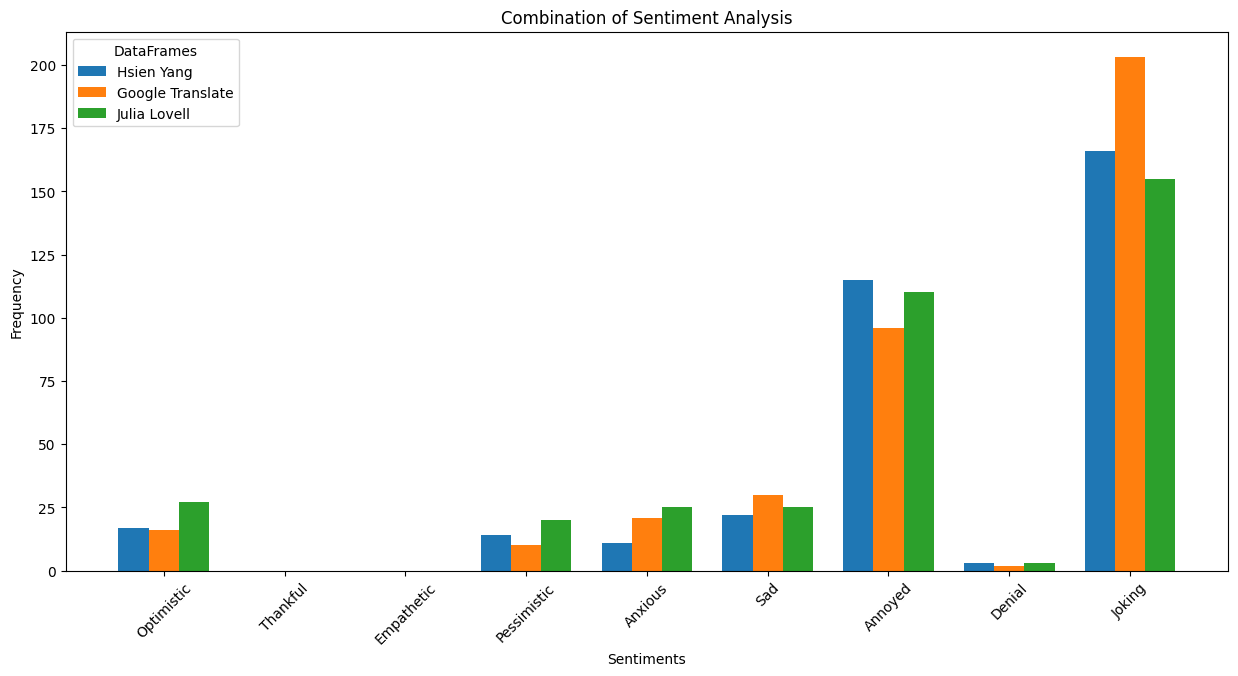

In [19]:
colors = ['blue', 'orange', 'green']

fig, ax = plt.subplots(figsize=(15, 7))
    
x = np.arange(len(sentiments_sums))
width = 0.25
    
ax.bar(x - width, sums_hsien.loc[0], width, label='Hsien Yang')
ax.bar(x, sums_google.loc[0], width, label='Google Translate')
ax.bar(x + width, sums_julia.loc[0], width, label='Julia Lovell')
    
ax.set_xlabel('Sentiments')
ax.set_ylabel('Frequency')
ax.set_title(f'Combination of Sentiment Analysis')
ax.set_xticks(x)
ax.set_xticklabels(sentiments_sums, rotation=45)
ax.legend(title='DataFrames')
    
plt.show()

In [11]:
def all_chapter_dataframe(base_path):
    total_df = pd.DataFrame()

    for j in range(1, 10):
        path = f'{base_path}{j}.csv'
        df = pd.read_csv(path)

        # Drop the 'Tweet' column if it exists
        if 'Tweet' in df.columns:
            df = df.drop(['Tweet'], axis=1)

        # Fill NaN values with 0
        for col in ['Optimistic', 'Thankful', 'Empathetic', 'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial', 'Joking']:
            if col in df.columns:
                df[col] = df[col].fillna(0)

        # Aggregate counts
        df_counts = df.sum().reset_index()
        df_counts.columns = ['Sentiment', 'Count']
        
        # Concatenate with total_df
        total_df = pd.concat([total_df, df_counts], axis=0, ignore_index=True)

    # Ensure all sentiment types are represented
    sentiment_list = ['Optimistic', 'Thankful', 'Empathetic', 'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial', 'Joking']
    new_df = pd.DataFrame({"Sentiment": sentiment_list, "Count": [0]*len(sentiment_list)})

    # Aggregate counts by sentiment
    for sentiment in sentiment_list:
        if sentiment in total_df['Sentiment'].values:
            new_df.loc[new_df['Sentiment'] == sentiment, 'Count'] = total_df[total_df['Sentiment'] == sentiment]['Count'].sum()

    return new_df

     Sentiment  Count  Count  Count
0   Optimistic     17     16     27
1     Thankful      0      0      0
2   Empathetic      0      0      0
3  Pessimistic     14     10     20
4      Anxious     11     21     25
5          Sad     22     31     25
6      Annoyed    115     97    110
7       Denial      3      2      3
8       Joking    166    202    155


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Optimistic'),
  Text(1, 0, 'Thankful'),
  Text(2, 0, 'Empathetic'),
  Text(3, 0, 'Pessimistic'),
  Text(4, 0, 'Anxious'),
  Text(5, 0, 'Sad'),
  Text(6, 0, 'Annoyed'),
  Text(7, 0, 'Denial'),
  Text(8, 0, 'Joking')])

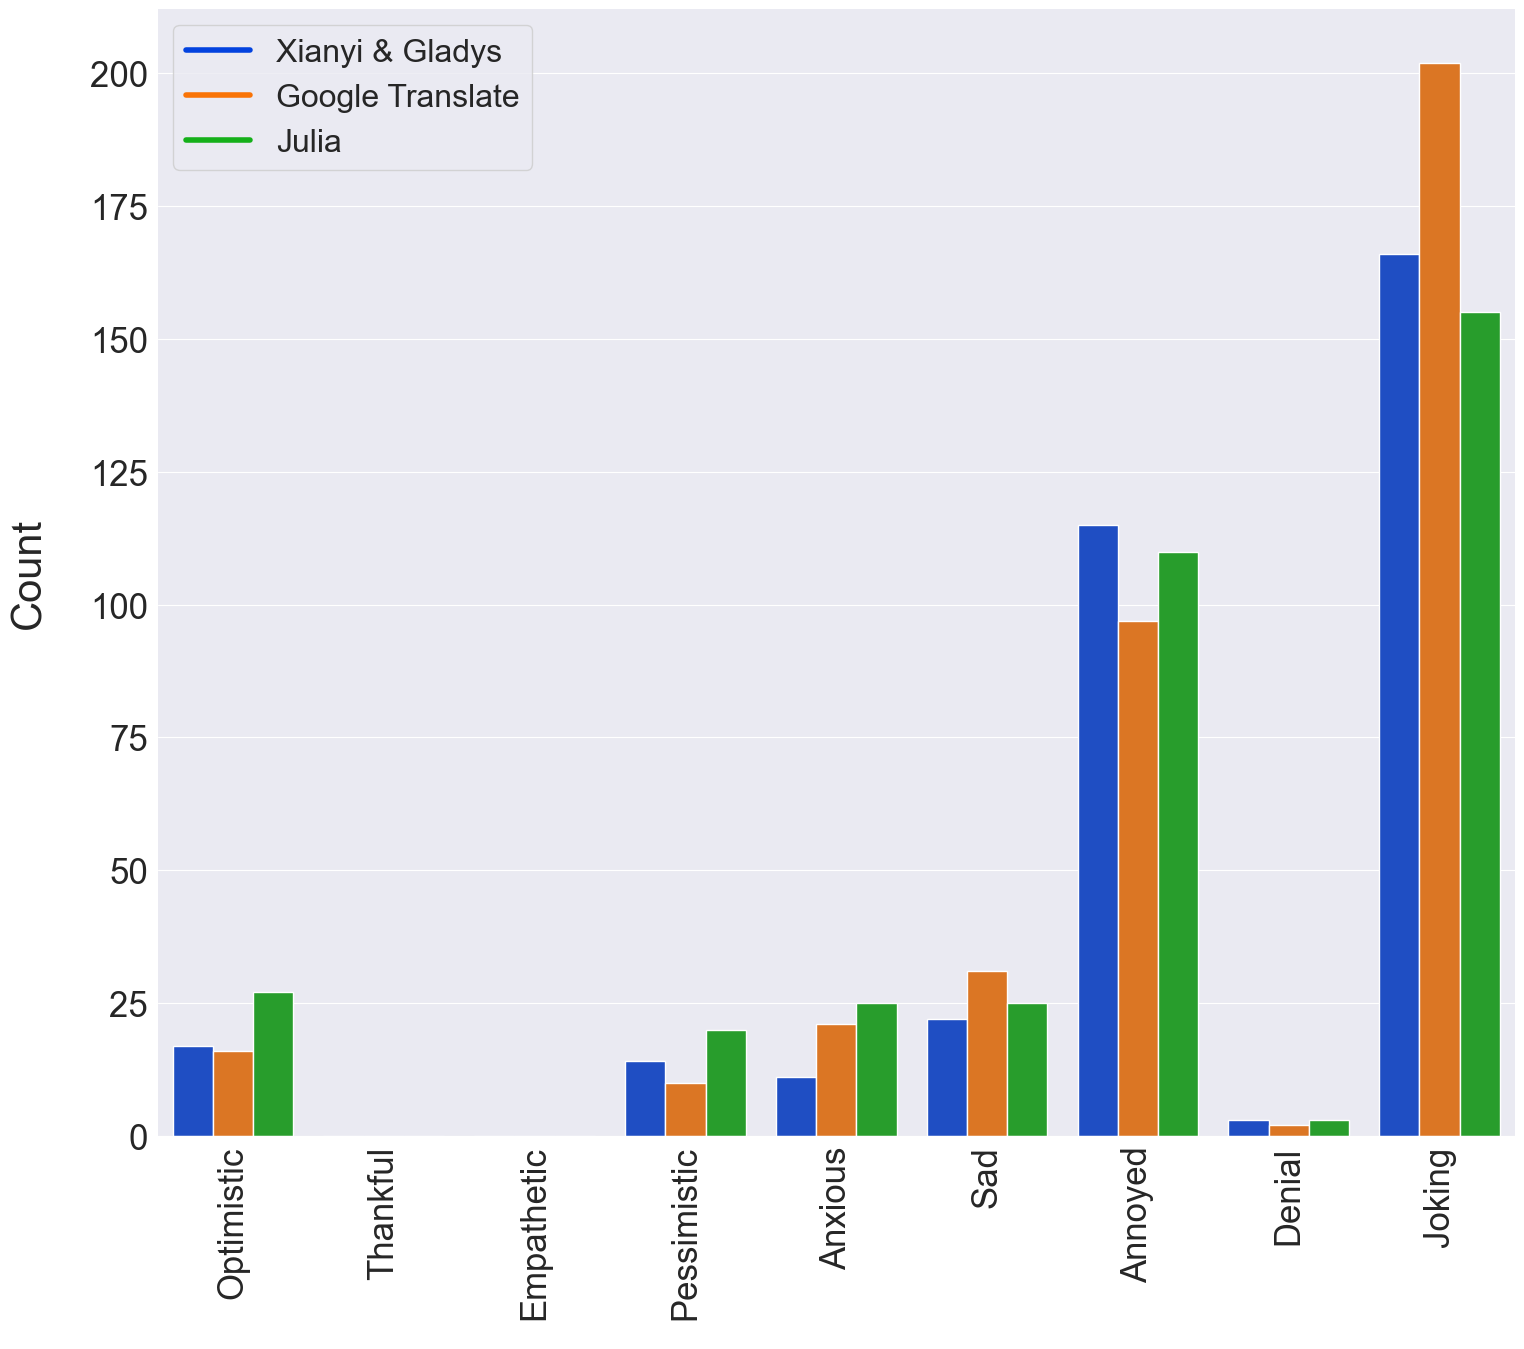

In [13]:

hsien_yang_all = all_chapter_dataframe(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_hsien_chapter')
google_translate_all = all_chapter_dataframe(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_google_chapter')
julia_lovell_all = all_chapter_dataframe(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_julia_chapter')

df_new = pd.concat([hsien_yang_all, google_translate_all['Count'], julia_lovell_all['Count']], axis=1)
print(df_new)
df_new.columns = ['Sentiment', 'Xianyi & Gladys', 'Google Translate', 'Julia']

df_new = pd.melt(df_new, id_vars="Sentiment", var_name="Author", value_name="Count")


colors = ["blue", "orange", "green"]
myPalette = sns.xkcd_palette(colors)

sns.set_style("darkgrid")
g = sns.catplot(x='Sentiment', y='Count', hue='Author', data=df_new, kind='bar', height=12, aspect=1.2, palette=myPalette, legend=False)

g.despine(left=True)

handles = [Line2D([0], [0], color=myPalette[i], lw=4) for i in range(len(df_new['Author'].unique()))]
labels = ['Xianyi & Gladys', 'Google Translate', 'Julia']
plt.legend(handles, labels, loc='best', prop={"size": 23})

plt.ylabel('Count', labelpad=30, fontsize=30)
plt.xlabel(' ')

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))    # format decimals on the y-axis
plt.yticks(fontsize= 25)
plt.xticks(fontsize = 25)
plt.xticks(rotation=90)

In [3]:
#heatmaps for google
heatmap_google = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_google_chapter1.csv')
heatmap_google = heatmap_google.drop(['Tweet'], axis=1)

for i in range(2, 10):
  df = pd.read_csv(f'/home/hsh/translationanalysis-Mandarin/sentiment_prediction/sentiment_prediction_google_chapter{i}.csv')

  df = df.drop(['Tweet'], axis=1)

  heatmap_google = pd.concat([heatmap_google, df], axis=0)

array_google = np.zeros((9, 9))

for i in range(len(heatmap_google)):
    l = heatmap_google.iloc[i].tolist()
    for j in range(9):
        if l[j] == 1.0:
            array_google[j][j] += 1
        for k in range(j+1, 9):                 # to avoid double counting.
            if (l[j] == 1.0) and (l[k] == 1.0):
                array_google[j][k] += int(1)
                array_google[k][j] += int(1)

emotions = ['Optimistic', 'Thankful', 'Empathetic', 'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial', 'Joking']

emote_df_google = pd.DataFrame(array_google, columns = emotions)
for col in emote_df_google:
    emote_df_google[col] = emote_df_google[col].astype(int)

fig = plt.figure(figsize = (16, 10))
sns.set(font_scale=2)
sns.heatmap(emote_df_google, annot = True, cmap = 'coolwarm', xticklabels = emote_df_google.columns, yticklabels = emote_df_google.columns, 
            fmt = 'g', annot_kws = {"size" : 16})


FileNotFoundError: [Errno 2] No such file or directory: '/home/hsh/translationanalysis-Mandarin/sentiment_prediction/sentiment_prediction_google_chapter1.csv'

<Axes: >

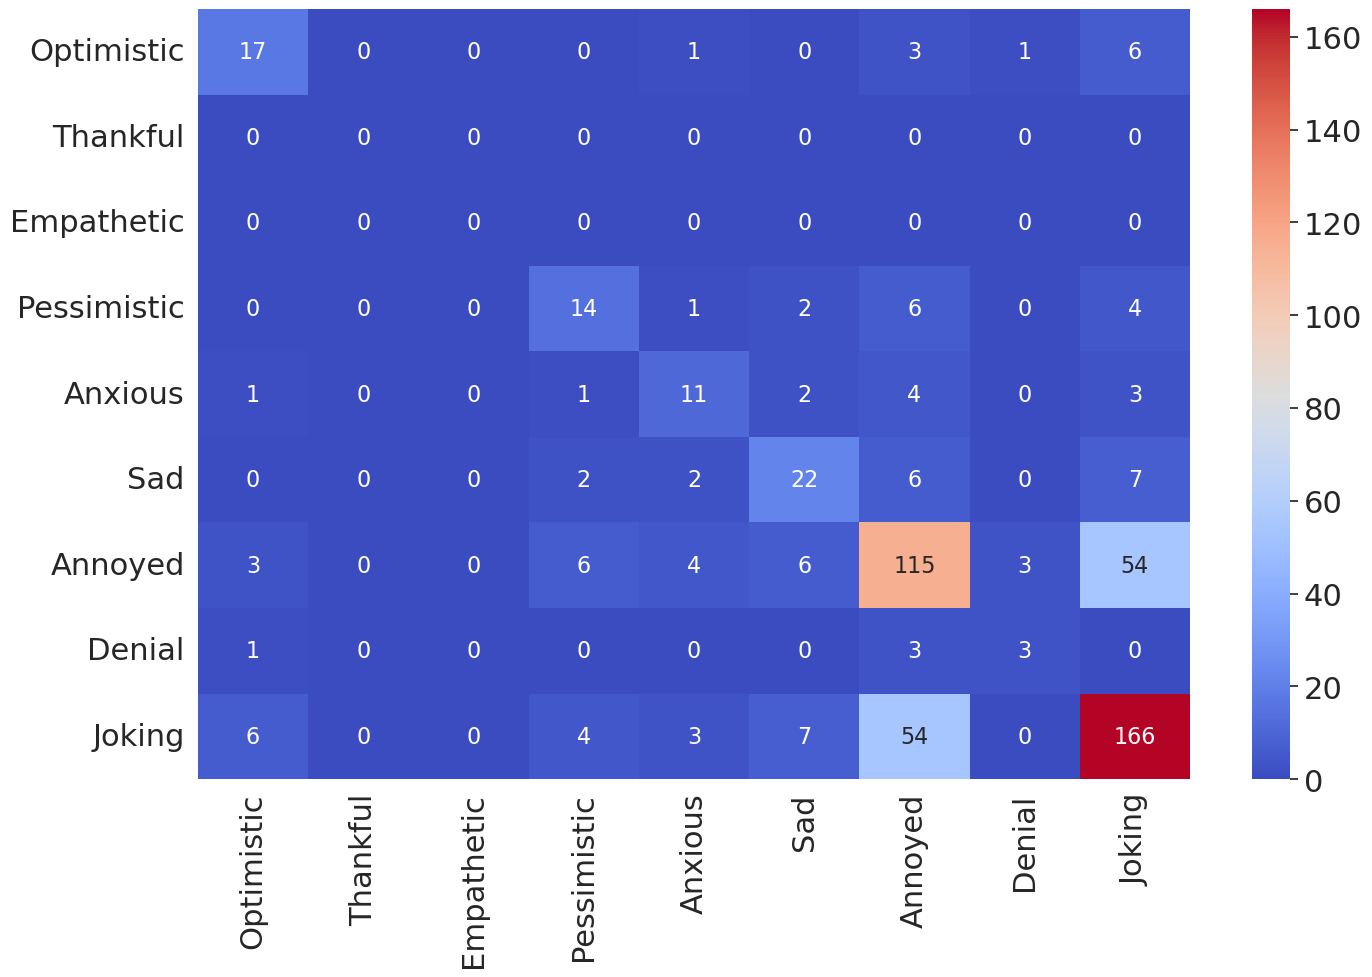

In [27]:
#heatmaps for hsien and gladys
heatmap_hsien = pd.read_csv('/home/hsh/translationanalysis-Mandarin/sentiment_prediction/sentiment_prediction_hsien_chapter1.csv')
heatmap_hsien = heatmap_hsien.drop(['Tweet'], axis=1)

for i in range(2, 10):
  df = pd.read_csv(f'/home/hsh/translationanalysis-Mandarin/sentiment_prediction/sentiment_prediction_hsien_chapter{i}.csv')

  df = df.drop(['Tweet'], axis=1)

  heatmap_hsien = pd.concat([heatmap_hsien, df], axis=0)

array_hsien = np.zeros((9, 9))

for i in range(len(heatmap_hsien)):
    l = heatmap_hsien.iloc[i].tolist()
    for j in range(9):
        if l[j] == 1.0:
            array_hsien[j][j] += 1
        for k in range(j+1, 9):                 # to avoid double counting.
            if (l[j] == 1.0) and (l[k] == 1.0):
                array_hsien[j][k] += int(1)
                array_hsien[k][j] += int(1)

emotions = ['Optimistic', 'Thankful', 'Empathetic', 'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial', 'Joking']

emote_df_hsien = pd.DataFrame(array_hsien, columns = emotions)
for col in emote_df_hsien:
    emote_df_hsien[col] = emote_df_hsien[col].astype(int)

fig = plt.figure(figsize = (16, 10))
sns.set(font_scale=2)
sns.heatmap(emote_df_hsien, annot = True, cmap = 'coolwarm', xticklabels = emote_df_hsien.columns, yticklabels = emote_df_hsien.columns, 
            fmt = 'g', annot_kws = {"size" : 16})


<Axes: >

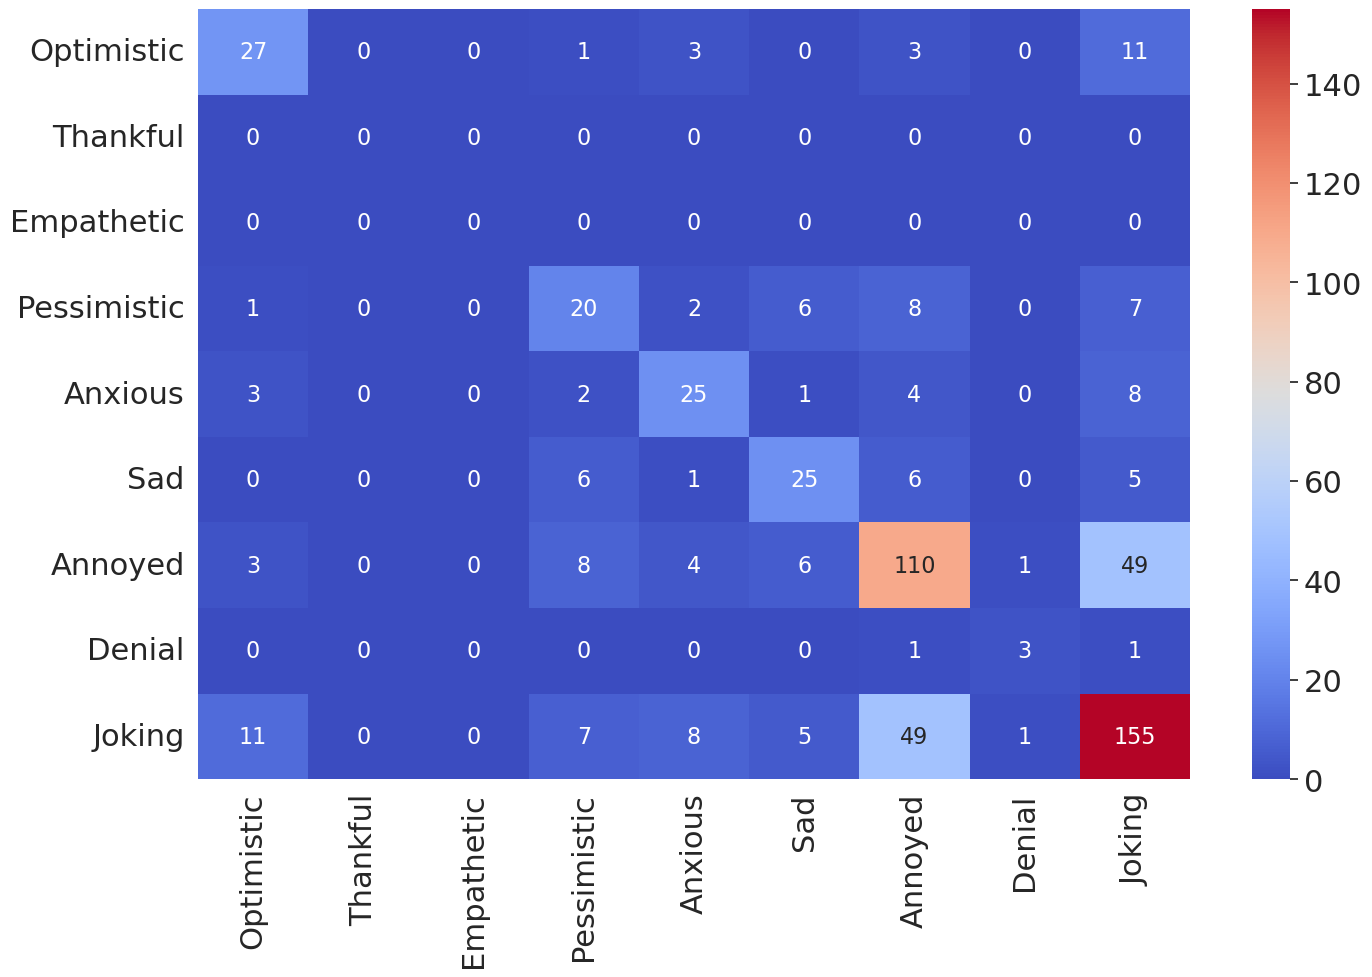

In [30]:
#heatmaps for Julia Lovell
heatmap_julia = pd.read_csv('/home/hsh/translationanalysis-Mandarin/sentiment_prediction/sentiment_prediction_julia_chapter1.csv')
heatmap_julia = heatmap_julia.drop(['Tweet'], axis=1)

for i in range(2, 10):
  df = pd.read_csv(f'/home/hsh/translationanalysis-Mandarin/sentiment_prediction/sentiment_prediction_julia_chapter{i}.csv')

  df = df.drop(['Tweet'], axis=1)

  heatmap_julia = pd.concat([heatmap_julia, df], axis=0)

array_julia = np.zeros((9, 9))

for i in range(len(heatmap_julia)):
    l = heatmap_julia.iloc[i].tolist()
    for j in range(9):
        if l[j] == 1.0:
            array_julia[j][j] += 1
        for k in range(j+1, 9):                 # to avoid double counting.
            if (l[j] == 1.0) and (l[k] == 1.0):
                array_julia[j][k] += int(1)
                array_julia[k][j] += int(1)

emotions = ['Optimistic', 'Thankful', 'Empathetic', 'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial', 'Joking']

emote_df_julia = pd.DataFrame(array_julia, columns = emotions)
for col in emote_df_julia:
    emote_df_julia[col] = emote_df_julia[col].astype(int)

fig = plt.figure(figsize = (16, 10))
sns.set(font_scale=2)
sns.heatmap(emote_df_julia, annot = True, cmap = 'coolwarm', xticklabels = emote_df_julia.columns, yticklabels = emote_df_julia.columns, 
            fmt = 'g', annot_kws = {"size" : 16})


In [20]:
#jaccard similarities

from sklearn.metrics import jaccard_score


In [21]:

df_hsien_google = pd.DataFrame()
df_google_julia = pd.DataFrame()
df_hsien_julia = pd.DataFrame()

chapter_num = []
hsien_google_list = []
google_julia_list = []
hsien_julia_list = []

hg = []
gj = []
hj = []

sum1 = 0
sum2 = 0
sum3 = 0

In [23]:
for i in range(1, 10):
    google_df = pd.read_csv(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_google_chapter{i}.csv')
    hsien_df = pd.read_csv(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_hsien_chapter{i}.csv')
    julia_df = pd.read_csv(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_julia_chapter{i}.csv')

    google_df = google_df.drop(["Tweet"], axis = 1)
    hsien_df = hsien_df.drop(["Tweet"], axis = 1)
    julia_df = julia_df.drop(["Tweet"], axis = 1)

    for ii in range(0, google_df.shape[0]):
        hsien_google_list.append(jaccard_score(hsien_df.iloc[ii, :], google_df.iloc[ii, :]))
        google_julia_list.append(jaccard_score(google_df.iloc[ii, :], julia_df.iloc[ii, :]))
        hsien_julia_list.append(jaccard_score(hsien_df.iloc[ii, :], julia_df.iloc[ii, :]))
    
    chapter_num.append(i)

    df_hsien_google1 = pd.DataFrame(chapter_num, columns=['Chapter'])
    df_hsien_google2 = pd.DataFrame(hsien_google_list, columns=['Xianyi & Gladys  Google'])
    df_hsien_google = pd.concat([df_hsien_google1, df_hsien_google2], axis=1)


    df_google_julia1 = pd.DataFrame(chapter_num, columns=['Chapter'])
    df_google_julia2 = pd.DataFrame(google_julia_list, columns=['Julia  Google'])
    df_google_julia = pd.concat([df_google_julia1, df_google_julia2], axis=1)

    df_hsien_julia1 = pd.DataFrame(chapter_num, columns=['Chapter'])
    df_hsien_julia2 = pd.DataFrame(hsien_julia_list, columns=['Xianyi & Gladys  Julia'])
    df_hsien_julia = pd.concat([df_hsien_julia1, df_hsien_julia2], axis=1)

    print('Chapter ', str(i), ' Average')

    print('Xianyi & Gladys  Google', df_hsien_google['Xianyi & Gladys  Google'].mean())
    print('Julia  Google', df_google_julia['Julia  Google'].mean())
    print('Xianyi & Gladys  Julia', df_hsien_julia['Xianyi & Gladys  Julia'].mean())

    print('\n')

    sum1 += df_hsien_google['Xianyi & Gladys  Google'].mean()
    sum2 += df_google_julia['Julia  Google'].mean()
    sum3 += df_hsien_julia['Xianyi & Gladys  Julia'].mean()



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Chapter  1  Average
Xianyi & Gladys  Google 0.5833333333333334
Julia  Google 0.5694444444444444
Xianyi & Gladys  Julia 0.7222222222222222


Chapter  2  Average
Xianyi & Gladys  Google 0.5921985815602837
Julia  Google 0.5709219858156028
Xianyi & Gladys  Julia 0.7216312056737588


Chapter  3  Average
Xianyi & Gladys  Google 0.6270833333333333
Julia  Google 0.5885416666666666
Xianyi & Gladys  Julia 0.690625


Chapter  4  Average
Xianyi & Gladys  Google 0.5874316939890709
Julia  Google 0.555327868852459
Xianyi & Gladys  Julia 0.6618852459016393


Chapter  5  Average
Xianyi & Gladys  Google 0.5850111856823266
Julia  Google 0.5598434004474272
Xianyi & Gladys  Julia 0.6700223713646533


Chapter  6  Average
Xianyi & Gladys  Google 0.5506445672191528
Julia  Google 0.5253222836095764
Xianyi & Gladys  Julia 0.6233885819521179




/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

Chapter  7  Average
Xianyi & Gladys  Google 0.5731523378582202
Julia  Google 0.5343137254901961
Xianyi & Gladys  Julia 0.6003016591251886


Chapter  8  Average
Xianyi & Gladys  Google 0.5548862115127176
Julia  Google 0.5194109772423025
Xianyi & Gladys  Julia 0.5990629183400268


Chapter  9  Average
Xianyi & Gladys  Google 0.5365296803652968
Julia  Google 0.5068493150684932
Xianyi & Gladys  Julia 0.5873287671232876




/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [66]:
#polarity score

polarity_array = []
chapter = 1
df_sentiments = pd.DataFrame(columns=['Chapter', 'Polarity'])

for i in range(1, 10):
    hsien_chapter = pd.read_csv(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_google_chapter{i}.csv')

    polarity = 0
    count = 0
    
    for _, row in hsien_chapter.iterrows():
      if row.get('Optimistic', 0) == 1.0:
            count += 1
            polarity += 1

      if row.get('Thankful', 0) == 1.0:
            count += 1
            polarity += 1

      if row.get('Empathetic', 0) == 1.0:
            count += 1
            polarity += 1

      if row.get('Denial', 0) == 1.0:
            count += 1
            polarity -= 1

      if row.get('Annoyed', 0) == 1.0:
            count += 1
            polarity -= 1

      if row.get('Sad', 0) == 1.0:
            count += 1
            polarity -= 1

      if row.get('Anxious', 0) == 1.0:
            count += 1
            polarity -= 1

      if row.get('Pessimistic', 0) == 1.0:
            count += 1
            polarity -= 1

      if row.get('Joking', 0) == 1.0:
            polarity += 0
      
    df_temp = pd.DataFrame([[chapter, polarity]], columns=['Chapter', 'Polarity'])
    df_sentiments = pd.concat([df_sentiments, df_temp], axis=0, ignore_index=True)
  
    chapter += 1

df_sentiments = df_sentiments.sort_values('Chapter').reset_index(drop=True)

print(df_sentiments)


  Chapter Polarity
0       1       -6
1       2       -8
2       3      -21
3       4      -18
4       5      -15
5       6      -11
6       7      -14
7       8      -22
8       9      -30
Index(['Chapter', 'Polarity'], dtype='object')


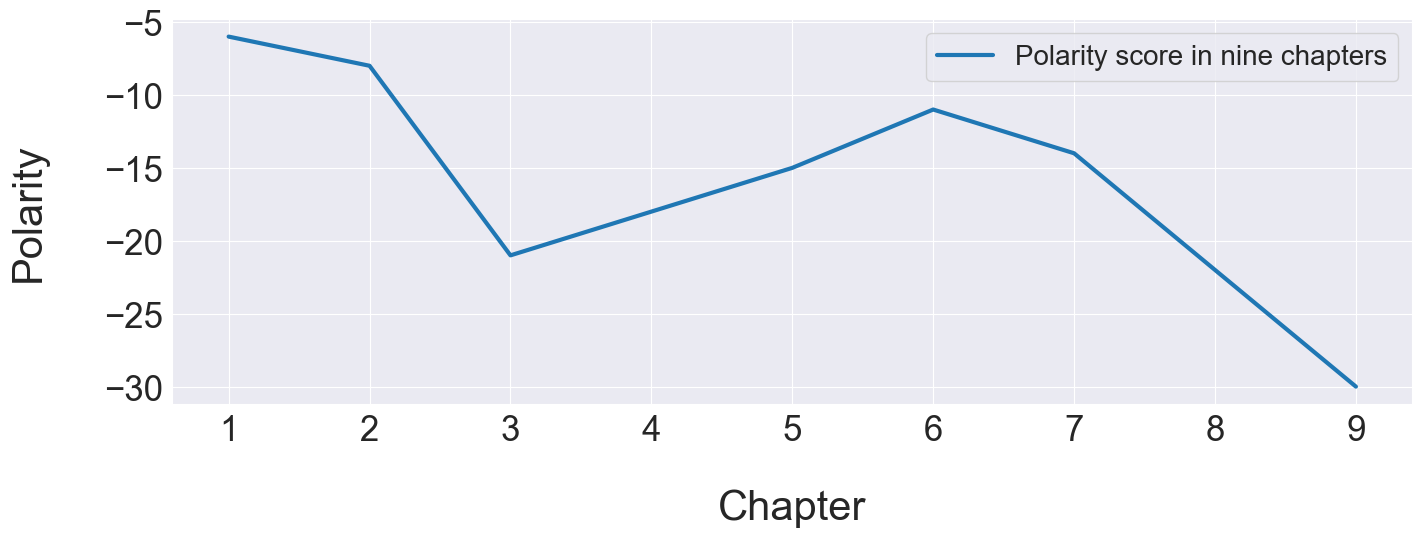

In [72]:

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(16,5))
p6=sns.lineplot(x = df_sentiments['Chapter'], y = df_sentiments['Polarity'], label='Polarity score in nine chapters',  linewidth=3)
p6.set_xlabel("Chapter")

plt.ylabel('Polarity', labelpad=40, fontsize=30)
plt.xlabel('Chapter', labelpad=30, fontsize=30)

plt.yticks(fontsize= 25)
plt.xticks(np.arange(1, 10, step=1), fontsize = 25)

plt.show()

In [74]:
polarity_array = []
chapter = 1
df_sentiments = pd.DataFrame(columns=['Chapter', 'Polarity'])

for i in range(1, 10):
    hsien_chapter = pd.read_csv(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_hsien_chapter{i}.csv')

    polarity = 0
    count = 0
    
    for _, row in hsien_chapter.iterrows():
      if row.get('Optimistic', 0) == 1.0:
            count += 1
            polarity += 1

      if row.get('Thankful', 0) == 1.0:
            count += 1
            polarity += 1

      if row.get('Empathetic', 0) == 1.0:
            count += 1
            polarity += 1

      if row.get('Denial', 0) == 1.0:
            count += 1
            polarity -= 1

      if row.get('Annoyed', 0) == 1.0:
            count += 1
            polarity -= 1

      if row.get('Sad', 0) == 1.0:
            count += 1
            polarity -= 1

      if row.get('Anxious', 0) == 1.0:
            count += 1
            polarity -= 1

      if row.get('Pessimistic', 0) == 1.0:
            count += 1
            polarity -= 1

      if row.get('Joking', 0) == 1.0:
            polarity += 0
      
    df_temp = pd.DataFrame([[chapter, polarity]], columns=['Chapter', 'Polarity'])
    df_sentiments = pd.concat([df_sentiments, df_temp], axis=0, ignore_index=True)
  
    chapter += 1

df_sentiments = df_sentiments.sort_values('Chapter').reset_index(drop=True)

print(df_sentiments)

  Chapter Polarity
0       1       -8
1       2      -11
2       3      -18
3       4      -17
4       5      -13
5       6      -14
6       7      -18
7       8      -20
8       9      -29


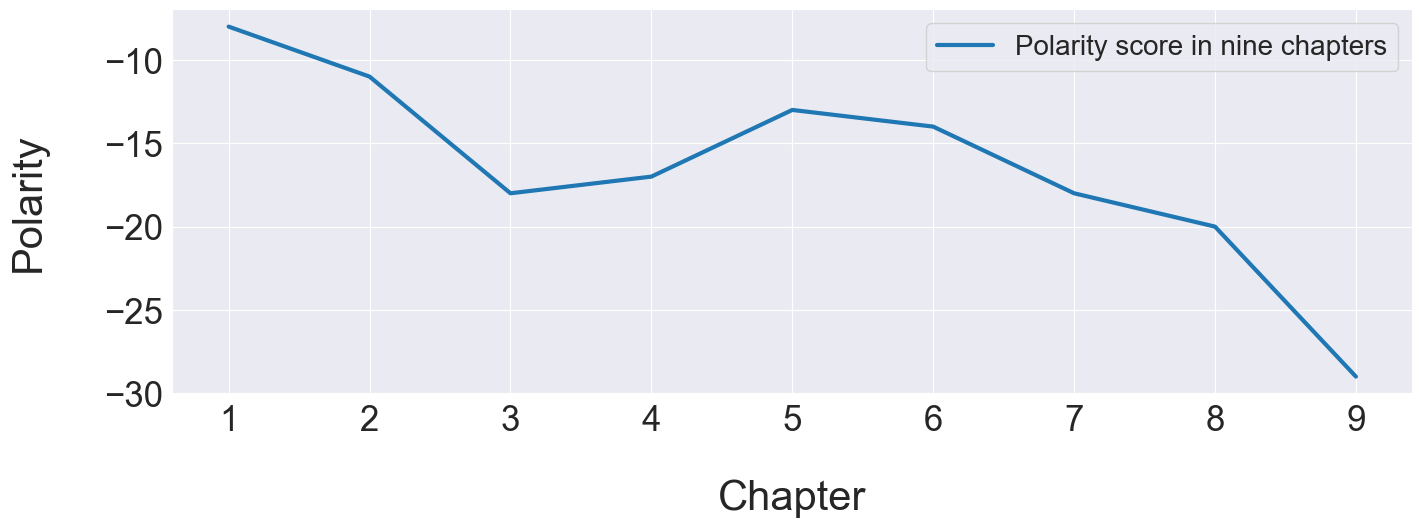

In [75]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(16,5))
p6=sns.lineplot(x = df_sentiments['Chapter'], y = df_sentiments['Polarity'], label='Polarity score in nine chapters',  linewidth=3)
p6.set_xlabel("Chapter")

plt.ylabel('Polarity', labelpad=40, fontsize=30)
plt.xlabel('Chapter', labelpad=30, fontsize=30)

plt.yticks(fontsize= 25)
plt.xticks(np.arange(1, 10, step=1), fontsize = 25)

plt.show()

In [76]:
polarity_array = []
chapter = 1
df_sentiments = pd.DataFrame(columns=['Chapter', 'Polarity'])

for i in range(1, 10):
    hsien_chapter = pd.read_csv(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_julia_chapter{i}.csv')

    polarity = 0
    count = 0
    
    for _, row in hsien_chapter.iterrows():
      if row.get('Optimistic', 0) == 1.0:
            count += 1
            polarity += 1

      if row.get('Thankful', 0) == 1.0:
            count += 1
            polarity += 1

      if row.get('Empathetic', 0) == 1.0:
            count += 1
            polarity += 1

      if row.get('Denial', 0) == 1.0:
            count += 1
            polarity -= 1

      if row.get('Annoyed', 0) == 1.0:
            count += 1
            polarity -= 1

      if row.get('Sad', 0) == 1.0:
            count += 1
            polarity -= 1

      if row.get('Anxious', 0) == 1.0:
            count += 1
            polarity -= 1

      if row.get('Pessimistic', 0) == 1.0:
            count += 1
            polarity -= 1

      if row.get('Joking', 0) == 1.0:
            polarity += 0
      
    df_temp = pd.DataFrame([[chapter, polarity]], columns=['Chapter', 'Polarity'])
    df_sentiments = pd.concat([df_sentiments, df_temp], axis=0, ignore_index=True)
  
    chapter += 1

df_sentiments = df_sentiments.sort_values('Chapter').reset_index(drop=True)

print(df_sentiments)

  Chapter Polarity
0       1       -8
1       2      -15
2       3      -19
3       4      -22
4       5      -15
5       6      -15
6       7       -9
7       8      -19
8       9      -34


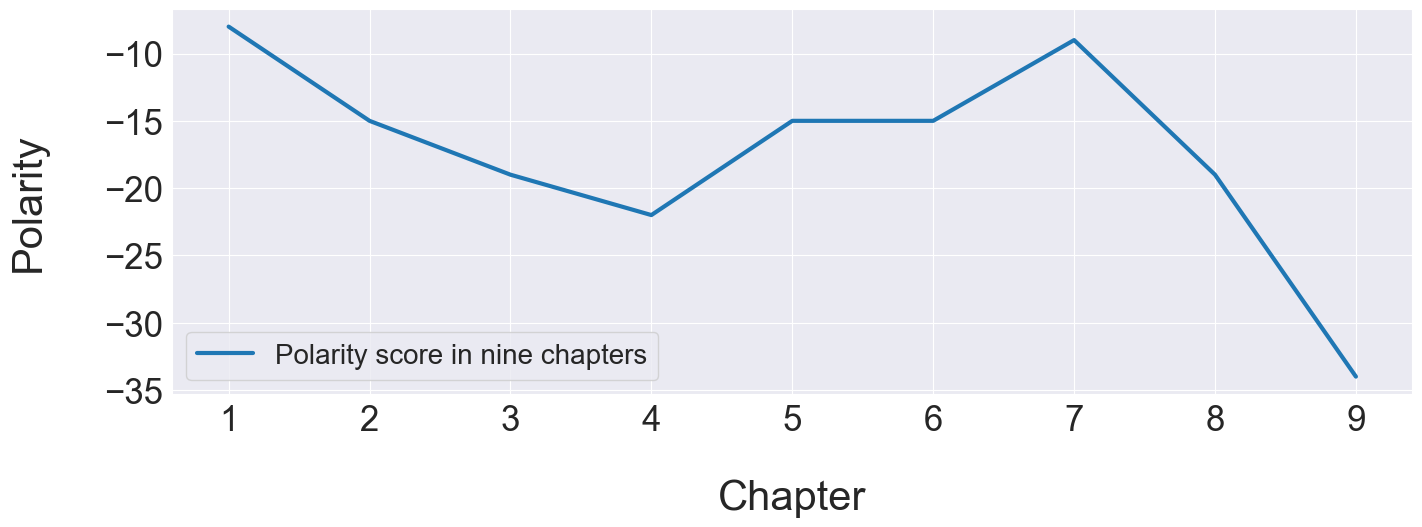

In [77]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(16,5))
p6=sns.lineplot(x = df_sentiments['Chapter'], y = df_sentiments['Polarity'], label='Polarity score in nine chapters',  linewidth=3)
p6.set_xlabel("Chapter")

plt.ylabel('Polarity', labelpad=40, fontsize=30)
plt.xlabel('Chapter', labelpad=30, fontsize=30)

plt.yticks(fontsize= 25)
plt.xticks(np.arange(1, 10, step=1), fontsize = 25)

plt.show()

In [3]:
%pip install textBlob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 5.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
from textblob import TextBlob

In [16]:
#textBlob polarity score
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

tb_hsien_all = pd.DataFrame()

for i in range(1,10):
    tb_hsien = pd.read_csv(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_hsien_chapter{i}.csv')
    tb_hsien['Chapter'] = i
    tb_hsien['Translator'] = 'Xianyi and Gladys'
    tb_hsien_all = pd.concat([tb_hsien_all, tb_hsien], ignore_index=True)

tb_hsien_all['textblob_polarity'] = tb_hsien_all['Tweet'].apply(getPolarity)
tb_hsien_all
    




,Tweet,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Joking,Chapter,Translator,textblob_polarity
0,For several years now I have been meaning to w...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,Xianyi and Gladys,0.150000
1,And yet no sooner had I taken up my pen than I...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,Xianyi and Gladys,0.104672
2,The second difficulty confronting me was that ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,Xianyi and Gladys,0.075521
3,"""Ah Q, you miserable wretch! Did you say I bel...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,Xianyi and Gladys,-0.500000
4,Ah Q made no reply.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Xianyi and Gladys,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,"""Help, help!""",0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9,Xianyi and Gladys,0.000000
276,But Ah Q never uttered these words. All had tu...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9,Xianyi and Gladys,0.144444
277,"As for the after-effects of the robbery, the m...",0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9,Xianyi and Gladys,0.171429
278,"As for any discussion of the event, no questio...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,Xianyi and Gladys,-0.032011


In [17]:
tb_google_all = pd.DataFrame()

for i in range(1,10):
    tb_google = pd.read_csv(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_google_chapter{i}.csv')
    tb_google['Chapter'] = i
    tb_google['Translator'] = 'Google'
    tb_google_all = pd.concat([tb_google_all, tb_google], ignore_index=True)

tb_google_all['textblob_polarity'] = tb_google_all['Tweet'].apply(getPolarity)
tb_google_all


,Tweet,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Joking,Chapter,Translator,textblob_polarity
0,"I want to do a right circulation for Ah Q, it ...",0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,Google,0.221429
1,"However, it is difficult to make this quick ar...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,Google,0.054167
2,"Secondly, the passage of Li Zhuan is probably ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,Google,0.088839
3,"""Ah Q, you are a muddy boy! Do you say I am yo...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,Google,0.000000
4,Ah Q doesn't speak.,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,Google,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,"""Help,......""",0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9,Google,0.000000
276,"However, A Q did not say.He had a dark eyes lo...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9,Google,0.000000
277,"As for the influence at the time, the biggest ...",0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,9,Google,0.109524
278,"As for public opinion, there is no objection i...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,Google,-0.098611


In [19]:
tb_google_all = pd.DataFrame()

for i in range(1,10):
    tb_google = pd.read_csv(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_google_chapter{i}.csv')
    tb_google['Chapter'] = i
    tb_google['Translator'] = 'Google'
    tb_google_all = pd.concat([tb_google_all, tb_google], ignore_index=True)

tb_google_all['textblob_polarity'] = tb_google_all['Tweet'].apply(getPolarity)
tb_google_all

,Tweet,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Joking,Chapter,Translator,textblob_polarity
0,"I want to do a right circulation for Ah Q, it ...",0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,Google,0.221429
1,"However, it is difficult to make this quick ar...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,Google,0.054167
2,"Secondly, the passage of Li Zhuan is probably ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,Google,0.088839
3,"""Ah Q, you are a muddy boy! Do you say I am yo...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,Google,0.000000
4,Ah Q doesn't speak.,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,Google,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,"""Help,......""",0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9,Google,0.000000
276,"However, A Q did not say.He had a dark eyes lo...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9,Google,0.000000
277,"As for the influence at the time, the biggest ...",0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,9,Google,0.109524
278,"As for public opinion, there is no objection i...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,Google,-0.098611


In [20]:
tb_julia_all = pd.DataFrame()

for i in range(1,10):
    tb_julia = pd.read_csv(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_julia_chapter{i}.csv')
    tb_julia['Chapter'] = i
    tb_julia['Translator'] = 'Julia'
    tb_julia_all = pd.concat([tb_julia_all, tb_julia], ignore_index=True)

tb_julia_all['textblob_polarity'] = tb_julia_all['Tweet'].apply(getPolarity)
tb_julia_all

,Tweet,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Joking,Chapter,Translator,textblob_polarity
0,"For some years now, I’ve been wanting to set d...",0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,Julia,0.150278
1,But as I take up my pen to begin this distinct...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,Julia,0.118203
2,My second difficulty lies in how to start. You...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,Julia,0.139508
3,"‘You stupid bastard, Ah-Q!’ the honourable Mr ...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,Julia,-0.500000
4,Ah-Q said nothing.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Julia,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,‘Help...’,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9,Julia,0.000000
276,"But Ah-Q said nothing. His eyes were blind, hi...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9,Julia,-0.150000
277,It was Mr Provincial Examination who felt the ...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9,Julia,0.280952
278,Public opinion in Weizhuang was undivided: of ...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,9,Julia,-0.074286


In [22]:
tb_all = pd.DataFrame()

tb_all = pd.concat([tb_hsien_all, tb_google_all, tb_julia_all], ignore_index=True)

tb_all

,Tweet,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Joking,Chapter,Translator,textblob_polarity
0,For several years now I have been meaning to w...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,Xianyi and Gladys,0.150000
1,And yet no sooner had I taken up my pen than I...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,Xianyi and Gladys,0.104672
2,The second difficulty confronting me was that ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,Xianyi and Gladys,0.075521
3,"""Ah Q, you miserable wretch! Did you say I bel...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,Xianyi and Gladys,-0.500000
4,Ah Q made no reply.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Xianyi and Gladys,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,‘Help...’,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9,Julia,0.000000
836,"But Ah-Q said nothing. His eyes were blind, hi...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9,Julia,-0.150000
837,It was Mr Provincial Examination who felt the ...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9,Julia,0.280952
838,Public opinion in Weizhuang was undivided: of ...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,9,Julia,-0.074286


In [29]:
tb_all_pol = tb_all.groupby(['Chapter', 'Translator'])['textblob_polarity'].mean().reset_index()
tb_all_pol = tb_all_pol.rename(columns={'textblob_polarity': 'Mean of textblob_polarity'})
tb_all_pol

,Chapter,Translator,Mean of textblob_polarity
0,1,Google,0.074682
1,1,Julia,-0.022682
2,1,Xianyi and Gladys,0.046359
3,2,Google,0.045497
4,2,Julia,0.066151
5,2,Xianyi and Gladys,0.071989
6,3,Google,0.099288
7,3,Julia,0.069874
8,3,Xianyi and Gladys,0.007764
9,4,Google,-0.023406


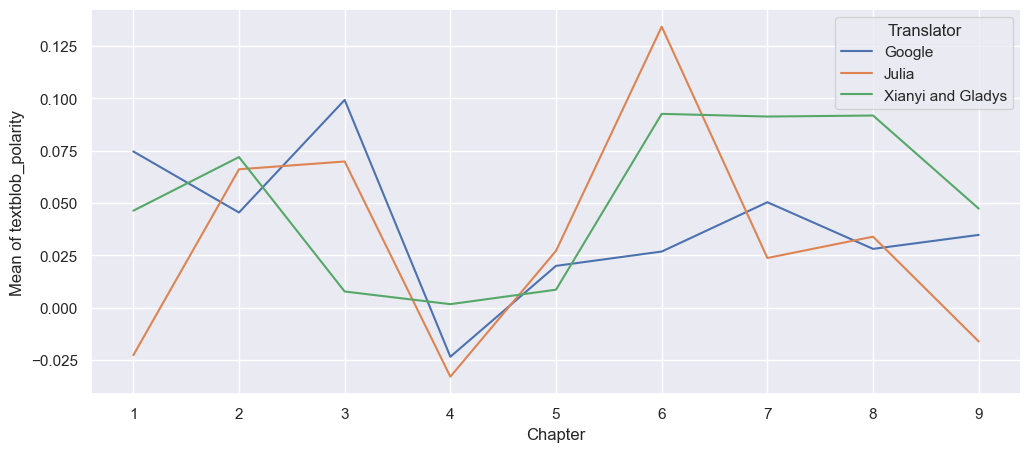

In [30]:
plt.figure(figsize=(12,5))
sns.set(style="darkgrid")
sns.lineplot(x="Chapter", y="Mean of textblob_polarity", hue="Translator", data=tb_all_pol)
plt.show()

In [34]:
labels = ['Optimistic', 'Thankful', 'Empathetic','Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial', 'Joking']

In [36]:
def calculate_polarity_score(row):
    score = 0
    if row['Optimistic'] == 1.0:
        score += 2
    if row['Thankful'] == 1.0:
        score += 3
    if row['Empathetic'] == 1.0:
        score += 0
    if row['Pessimistic'] == 1.0:
        score -= 4
    if row['Anxious'] == 1.0:
        score -= 2
    if row['Sad'] == 1.0:
        score -= 3
    if row['Annoyed'] == 1.0:
        score -= 1
    if row['Denial'] == 1.0:
        score -= 5
    if row['Joking'] == 1.0:
        score += 1
    return score

In [43]:
tb_all['Polarity Score'] = tb_all.apply(calculate_polarity_score, axis=1)

score = tb_all['Polarity Score']
score = score/9

tb_all['Polarity Score'] = score

tb_all

,Tweet,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Joking,Chapter,Translator,textblob_polarity,Polarity Score
0,For several years now I have been meaning to w...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,Xianyi and Gladys,0.150000,-0.333333
1,And yet no sooner had I taken up my pen than I...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,Xianyi and Gladys,0.104672,-0.555556
2,The second difficulty confronting me was that ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,Xianyi and Gladys,0.075521,0.111111
3,"""Ah Q, you miserable wretch! Did you say I bel...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,Xianyi and Gladys,-0.500000,-0.111111
4,Ah Q made no reply.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Xianyi and Gladys,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,‘Help...’,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9,Julia,0.000000,0.000000
836,"But Ah-Q said nothing. His eyes were blind, hi...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9,Julia,-0.150000,-0.333333
837,It was Mr Provincial Examination who felt the ...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9,Julia,0.280952,-0.444444
838,Public opinion in Weizhuang was undivided: of ...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,9,Julia,-0.074286,0.000000


In [44]:
tb_all_normal_pol = tb_all.groupby(['Chapter', 'Translator'])['Polarity Score'].mean().reset_index()
tb_all_normal_pol = tb_all_normal_pol.rename(columns={'Polarity Score': 'Mean of Polarity Score'})
tb_all_normal_pol

,Chapter,Translator,Mean of Polarity Score
0,1,Google,0.000000
1,1,Julia,-0.092593
2,1,Xianyi and Gladys,-0.111111
3,2,Google,0.048309
4,2,Julia,-0.024155
5,2,Xianyi and Gladys,-0.004831
6,3,Google,-0.043771
7,3,Julia,-0.013468
8,3,Xianyi and Gladys,-0.003367
9,4,Google,-0.013228


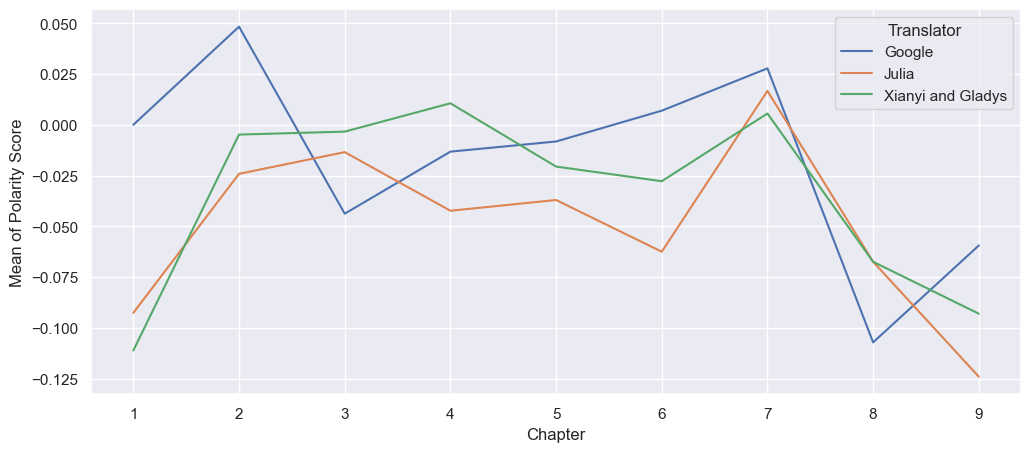

In [45]:
plt.figure(figsize=(12,5))
sns.set(style="darkgrid")
sns.lineplot(x="Chapter", y="Mean of Polarity Score", hue="Translator", data=tb_all_normal_pol)
plt.show()